In [1]:
try:
    import folium
    import dash
    from dash import dcc
    from dash import html
    from dash.dependencies import Input, Output
    import plotly.express as px
    import pandas as pd
    import matplotlib.pyplot as plt
    from mplsoccer import Pitch, VerticalPitch
    from matplotlib.patches import Circle
    from matplotlib.patches import Rectangle
    import math
    import numpy as np
except:
    %pip install folium
    %pip install dash
    %pip install plotly
    %pip install mplsoccer
    import pandas as pd
    import matplotlib.pyplot as plt
    from mplsoccer import Pitch, VerticalPitch
    from matplotlib.patches import Circle
    import math
    import numpy as np
    import dash
    from dash import dcc
    from dash import html
    from dash.dependencies import Input, Output
    import plotly.express as px
    from matplotlib.patches import Rectangle
    import folium

In [2]:
#reading csv
eventsMessi = pd.read_csv('eventsMessi.csv')

C:\Users\yashaswi\AppData\Local\Temp\ipykernel_18900\1308467389.py:1: DtypeWarning: Columns (1,4,5,6,7,10,12,13,14,16,17,18,19,28,40,42,44,46,49,50,64,65,66,67,68,69,70,71,73,74,75,76,83,84,85,86,88,89,90,91,92,93,97,98,99,100,101,102,103,104,105,106,107,113) have mixed types. Specify dtype option on import or set low_memory=False.
  eventsMessi = pd.read_csv('eventsMessi.csv')


In [3]:
eventsMessi

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,player_off_permanent,goalkeeper_success_out,half_end_early_video_end,goalkeeper_saved_to_post,x_start,y_start,x_end,y_end,x_carry_end,y_carry_end
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49.1,56.9,45.5,55.3,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,61.9,34.5,77.7,67.2,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,79.7,59.7,65.1,60.9,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,77.7,58.1,94.0,45.6,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,92.0,49.6,112.4,37.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,97.9,63.3,NaN,NaN,NaN,NaN
115197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.7,15.0,NaN,NaN,NaN,NaN
115198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,86.8,19.6,NaN,NaN,NaN,NaN
115199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,81.8,22.2,NaN,NaN,NaN,NaN


In [4]:
seasons = sorted(eventsMessi['season'].unique().tolist())

In [5]:
#Dividing Messi's career into 4 eras
col = eventsMessi.columns.tolist()

initialYears = pd.DataFrame(columns=col)
pepYears = pd.DataFrame(columns=col)
msnYears = pd.DataFrame(columns=col)
swanSong = pd.DataFrame(columns=col)

dfList = []

for season in seasons:
    if(season=='2004/2005' or season=='2005/2006'
       or season=='2006/2007' or season=='2007/2008'):
        initialYears = pd.concat([initialYears,eventsMessi[eventsMessi['season']==season]])

    elif(season=='2008/2009' or season=='2009/2010'
       or season=='2010/2011' or season=='2011/2012' or season=='2012/2013'):
        pepYears = pd.concat([pepYears,eventsMessi[eventsMessi['season']==season]])

    elif(season=='2013/2014'or season=='2014/2015'
         or season=='2015/2016'or season=='2016/2017'):
        msnYears = pd.concat([msnYears,eventsMessi[eventsMessi['season']==season]])

    else:
        swanSong = pd.concat([swanSong,eventsMessi[eventsMessi['season']==season]])


C:\Users\yashaswi\AppData\Local\Temp\ipykernel_18900\2749173163.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  initialYears = pd.concat([initialYears,eventsMessi[eventsMessi['season']==season]])
C:\Users\yashaswi\AppData\Local\Temp\ipykernel_18900\2749173163.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pepYears = pd.concat([pepYears,eventsMessi[eventsMessi['season']==season]])
C:\Users\yashaswi\AppData\Local\Temp\ipykernel_18900\2749173163.py:21: FutureWarning: The behavior of Data

In [6]:
# creating a function to plot heat map for the various attributes such as Passing, Ball carry
def heatmap(df,type,title):
    if(type=="pass"):
        pitch = Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00',half=True)
        fig, ax = pitch.grid(title_height=0.03, title_space=0,
                      axis=False, grid_height=0.60, grid_width=1, endnote_height=0)
    elif(type=="all"):
        pitch = Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00')
        fig, ax = pitch.grid(title_height=0.03, title_space=0,
                      axis=False, grid_height=0.60, grid_width=1, endnote_height=0)
        fig.set_figwidth(9)
    else:
        pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00')
        fig, ax = pitch.grid(title_height=0.05, title_space=0,
                      axis=False, grid_height=0.60, grid_width=1, endnote_height=0)

    fig.set_facecolor('#a50044')

    x = df["x_start"]
    y = df["y_start"]

    if(type=="carryEnd"):
        x = df["x_carry_end"]
        y = df["y_carry_end"]

    bin_x = np.linspace(pitch.dim.left, pitch.dim.right, num=7)
    bin_y = np.sort(np.array([pitch.dim.bottom, pitch.dim.six_yard_bottom,
                          pitch.dim.six_yard_top, pitch.dim.top]))


    bin_statistic = pitch.bin_statistic(x, y, statistic='count', bins=(bin_x, bin_y), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax['pitch'], cmap='hot', edgecolor='#f9f9f9',alpha=0.7)
    labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                                ax=ax['pitch'], ha='center', va='center',
                                str_format='{:.0%}')

    title_text = ax['title'].text(0.5, 0.5, title,
                               color='navy', va='center', ha='center', fontsize=15)

In [7]:
# creating a function to plot the pitch contating points related to dribbles start and end
def drib(dfSuc,dfNut,dfUnSuc,title):
    pitch = Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00')

    fig, axs = pitch.grid(endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.60, endnote_height=0)

    fig.set_facecolor('#a50044')

    sDribbles = pitch.scatter(dfSuc['x_start'], dfSuc['y_start'],
                   marker='*',
                   c='#00dd98',
                   label='successful Dribbles',
                   ax=axs['pitch'])

    nDribbles = pitch.scatter(dfNut['x_start'], dfNut['y_start'],
                    marker='h',
                    c='#eb0Aee',
                    label='Nutmeg',
                    ax=axs['pitch'])

    uDribbles = pitch.scatter(dfUnSuc['x_start'], dfUnSuc['y_start'],
                    marker='x',
                    c='#AA5500',
                    label='Unsuccessful Dribbles',
                    ax=axs['pitch'])

    title_text = axs['title'].text(0.5, 0.5, title,
                               color='navy', va='center', ha='center',fontsize=20)

    axs['pitch'].legend()

In [8]:
# creating a hexagonal heatmap to plot the carry of the ball
def hexbin(df,title1, title2):
    pitch = Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00')
    fig, axs = pitch.grid(nrows=1, ncols=2, title_height=0.03,
                      title_space=0,
                      axis=False,
                      grid_height=0.60, endnote_height=0)

    fig.set_facecolor('#a50044')
    psHexbin = pitch.hexbin(df['x_start'], df['y_start'], ax=axs['pitch'][0], edgecolors='#f4f4f4',
                        alpha=0.7, gridsize=(10,4), cmap='hot')
    peHexbin = pitch.hexbin(df['x_end'], df['y_end'], ax=axs['pitch'][1], edgecolors='#f4f4f4',
                        alpha=0.7, gridsize=(10,4), cmap='hot')

    cbar1 = fig.colorbar(psHexbin, ax=axs['pitch'][0], shrink=0.6,label='count')
    cbar2 = fig.colorbar(peHexbin, ax=axs['pitch'][1], shrink=0.6,label='count')

    title_text = axs['title'].text(0.2, 0, title1,
                               color='navy', va='center', ha='center', fontsize=20)

    title_text = axs['title'].text(0.7, 0, title2,
                               color='navy', va='center', ha='center', fontsize=20)


In [9]:
# creating a scatter plot function to mark the start and end of his passses
def scatter(df,type,title):
    pitch = Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00',half=True)

    fig, axs = pitch.grid(title_height=0.03, title_space=0,
                      axis=False, grid_height=0.60, grid_width=1, endnote_height=0)

    fig.set_facecolor('#a50044')

    if(type=="assists"):
        sAssists = pitch.scatter(df['x_start'], df['y_start'],
                   marker='*',
                   c='#00dd98',
                   ax=axs['pitch'])

    elif(type=="goals"):
        iyGoalsPlot = pitch.scatter(df['x_start'], df['y_start'],
                   marker='*',
                   c=df['shot_statsbomb_xg'],
                   s=(df['shot_statsbomb_xg']*900) + 100,
                   ax=axs['pitch'])

        cbar = fig.colorbar(iyGoalsPlot, ax=axs['pitch'], shrink=0.8,label='xG')

    title_text = axs['title'].text(0.5, 0.5, title,
                               color='navy', va='center', ha='center', fontsize=20)

In [10]:
# creating a function to calculate some statistics in various stages of his career such as expected goals, average goals goals, goals scored, etc
def evolution(avgIYX,avgIYY,avgPYX,avgPYY,avgMYX,avgMYY,avgSYX,avgSYY,title):
    pitch = Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00',half= True,
              pad_left=-15, pad_top=-20, pad_bottom=-1,pad_right=-1,positional=True)

    fig, axs = pitch.grid(title_height=0.03, title_space=0,
                      axis=False, grid_height=0.60, grid_width=1, endnote_height=0)

    fig.set_facecolor('#a50044')

    avgIY = pitch.scatter(avgIYX, avgIYY,
                marker='.',
                c='#eb0Aee',
                s=100,
                label='Initial Years',
                ax=axs['pitch'])

    avgPY = pitch.scatter(avgPYX, avgPYY,
                marker='.',
                c='red',
                s=100,
                label='Pep Years',
                ax=axs['pitch'])

    avgMY = pitch.scatter(avgMYX, avgMYY,
                marker='.',
                c='blue',
                s=100,
                label='MSN Years',
                ax=axs['pitch'])

    avgSY = pitch.scatter(avgSYX, avgSYY,
                marker='.',
                c='purple',
                s=100,
                label='Swan Song',
                ax=axs['pitch'])

    ax_title = axs['title'].text(0.5, 1, title, color='navy',
                             va='center', ha='center',fontsize=15)
    axs['pitch'].legend()


In [11]:
# creating a functin to plot the heat map showing the most common areas where Messi is passing the ball
def kdePlot(df1,df2,df3,df4,type,title):
    if(type=="s"):
        x1 = df1['x_start']
        y1 = df1['y_start']
        x2 = df2['x_start']
        y2 = df2['y_start']
        x3 = df3['x_start']
        y3 = df3['y_start']
        x4 = df4['x_start']
        y4 = df4['y_start']
    else:
        x1 = df1['x_end']
        y1 = df1['y_end']
        x2 = df2['x_end']
        y2 = df2['y_end']
        x3 = df3['x_end']
        y3 = df3['y_end']
        x4 = df4['x_end']
        y4 = df4['y_end']

    pitch = Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00')
    fig, ax = pitch.grid(nrows=2,ncols=2,title_height=0.06, title_space=0,
                      axis=False,
                      grid_height=0.60)
    fig.set_facecolor('#a50044')

    kdeplot1 = pitch.kdeplot(x1, y1,fill=True,n_levels=200,cmap='gnuplot', ax=ax['pitch'][0][0], thresh=0.9)
    kdeplot2 = pitch.kdeplot(x2, y2,fill=True,n_levels=200,cmap='gnuplot', ax=ax['pitch'][0][1], thresh=0.9)
    kdeplot3 = pitch.kdeplot(x3, y3,fill=True,n_levels=200,cmap='gnuplot', ax=ax['pitch'][1][0], thresh=0.9)
    kdeplot4 = pitch.kdeplot(x4, y4,fill=True,n_levels=200,cmap='gnuplot', ax=ax['pitch'][1][1], thresh=0.9)

    ax_title = ax['title'].text(0.5, 0.5, title, color='navy',
                             va='center', ha='center', fontsize=20)


In [12]:
# plotting the center circle and D Line cordinates
circH = Circle((120.0, 40.0), radius = 15)
circV = Circle((40.0, 120.0), radius = 15)

recH = Rectangle((120, 18), -18,45)
recV = Rectangle((18, 120), 45,-18)

In [13]:
# creating a function to extract the dangerous passes leading to a goal made by Messi
def dangerPass(df,type,title):

    DangerPass = [row['id'] for index,row in df.iterrows()
                  if ((circH.contains_point([row['x_end'],row['y_end']])==True)
                      or (circV.contains_point([row['x_end'],row['y_end']])==True))]

    DangerPasses = df[df['id'].isin(DangerPass)]

    if(type=='c'):
        return DangerPasses
    else:
        heatmap(DangerPasses,"pass",title)

In [14]:
# extracting set piece information
setpiece = ["Corner", "Throw-in","Free Kick", "Penalty"]

In [15]:
# creating a function to map the location and movement of Messi across the pitch
def avgLoc(df,axis):
    if(axis=="x"):
        pos = df[df['x_start'].isna()==False]['x_start']
    elif(axis=="y"):
        pos = df[df['y_start'].isna()==False]['y_start']
    elif(axis=="xend"):
        pos = df[df['x_end'].isna()==False]['x_end']
    elif(axis=="yend"):
        pos = df[df['y_end'].isna()==False]['y_end']
    elif(axis=="xcend"):
        pos = df[df['x_carry_end'].isna()==False]['x_carry_end']
    elif(axis=="ycend"):
        pos = df[df['y_carry_end'].isna()==False]['y_carry_end']

    avgLoc = sum(pos)/len(pos)

    return avgLoc

In [16]:
# a function to plot the number of goals scored from inside the penalty area and outside of that
def penaltyBox(df,type):
    insideID = [row['id'] for index,row in df.iterrows()
                  if ((recH.contains_point([row['x_start'],row['y_start']])==True)
                      or (recV.contains_point([row['x_start'],row['y_start']])==True))]

    if(type=="in"):
        pbDf = df[df['id'].isin(insideID)]
    else:
        pbDf = df[~df['id'].isin(insideID)]

    return pbDf


In [17]:
# Calculating some stats related to goal scoring
def xG(df):
    xgTot = 0.0
    xgBox = 0.0
    xgOB = 0.0

    xgTot = sum(df['shot_statsbomb_xg'])

    for index,row in df.iterrows():
        if ((recH.contains_point([row['x_start'],row['y_start']])==True)
            or (recV.contains_point([row['x_start'],row['y_start']])==True)):
            xgBox = xgBox + row['shot_statsbomb_xg']
        else:
            xgOB = xgOB + row['shot_statsbomb_xg']

    return round(xgTot,2),round(xgBox,2),round(xgOB,2)

In [18]:
# extracting all the matches in which Messi has scored goals
goalMID = eventsMessi[eventsMessi['shot_outcome']=="Goal"]['match_id'].tolist()
assistMID = eventsMessi[eventsMessi['pass_goal_assist']==True]['match_id'].tolist()

In [19]:
messiMatches = pd.read_csv("messiMatches.csv")

In [20]:
# extracting all the goals scored by Messi
goalDate = []
for mid in goalMID:
    for index,row in messiMatches.iterrows():
        if(row['match_id'] == mid):
            goalDate.append(row['match_date'])

In [21]:
# saving all the dates on which Messi has scored in a Data Frame
goalDate = sorted(pd.to_datetime(goalDate))
goalDic = {"goalNumber":range(1,len(goalDate)+1), "Date": goalDate}
goalDates = pd.DataFrame(goalDic)

In [22]:
# extracting all the assists made by Messi
assistDate = []
for mid in assistMID:
    for index,row in messiMatches.iterrows():
        if(row['match_id'] == mid):
            assistDate.append(row['match_date'])

In [23]:
# saving all the dates on which Messi has made an assist in a data frame
assistDate = sorted(pd.to_datetime(assistDate))
assistDic = {"assistNumber":range(1,len(assistDate)+1), "Date": assistDate}
assistDates = pd.DataFrame(assistDic)

In [24]:
# creating a line chart with the goals scored vs date scored and making a similar graph for assist as well
goals_df = goalDates
assists_df = assistDates

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(style={'backgroundColor': '#a50044'}, children=[
    html.H1(style={'color': 'navy', 'textAlign': 'center'}, children='Messi\'s Goals and Assists'),

    # Dropdown for selecting Goals or Assists
    dcc.Dropdown(
        id='goal-assist-dropdown',
        options=[
            {'label': 'Goals', 'value': 'Goals'},
            {'label': 'Assists', 'value': 'Assists'}
        ],
        value='Goals',
        style={'width': '50%', 'margin': '10px auto'}
    ),

    # Graph for Goals and Assists
    dcc.Graph(
        id='goals-assists-graph'
    )
])

# Callback to update the graph based on dropdown selection
@app.callback(
    Output('goals-assists-graph', 'figure'),
    [Input('goal-assist-dropdown', 'value')]
)
def update_graph(selected_value):
    if selected_value == 'Goals':
        df = goals_df
        y='goalNumber'
    else:
        df = assists_df
        y='assistNumber'

    fig = px.line(df, x='Date',y=y, title=f'Messi\'s {selected_value} Over Time')
    fig.update_traces(line_color='#edbb00')

    fig.update_layout(plot_bgcolor = "#004d98",)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# Era Analysis

## Breakthrough

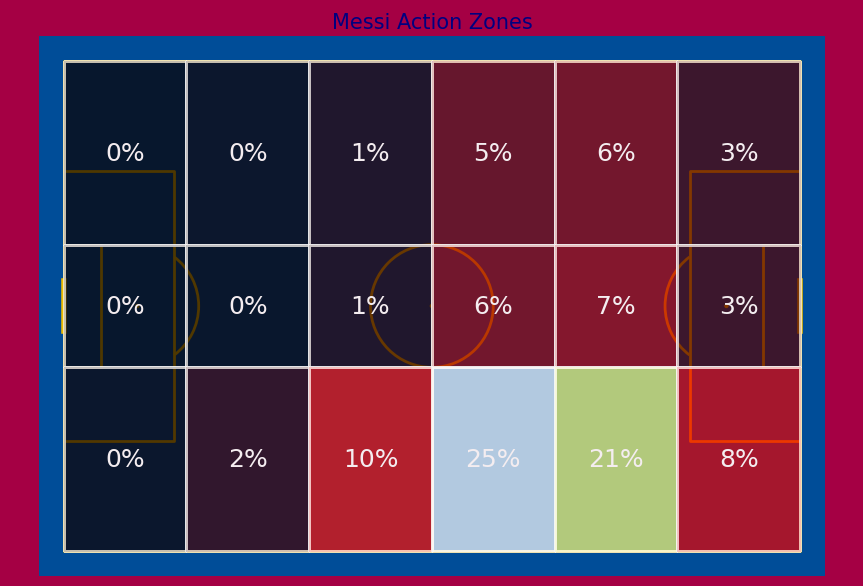

In [25]:
# calling the heatmap function to analyze the action zones of Messi
heatmap(initialYears,"all","Messi Action Zones")

### Movement

In [26]:
# extracting all the start points of carry's made during his initial years
iyCarry = initialYears[initialYears['type']=='Carry']

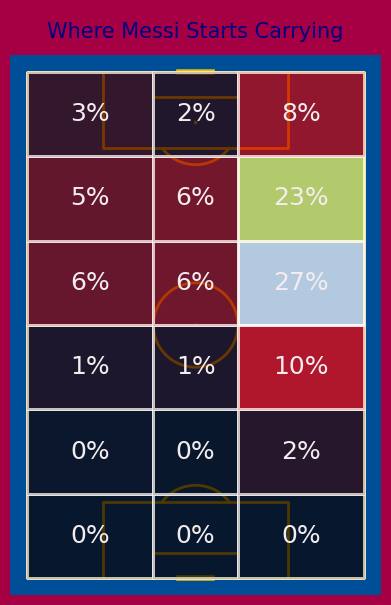

In [27]:
heatmap(iyCarry,"start", "Where Messi Starts Carrying")

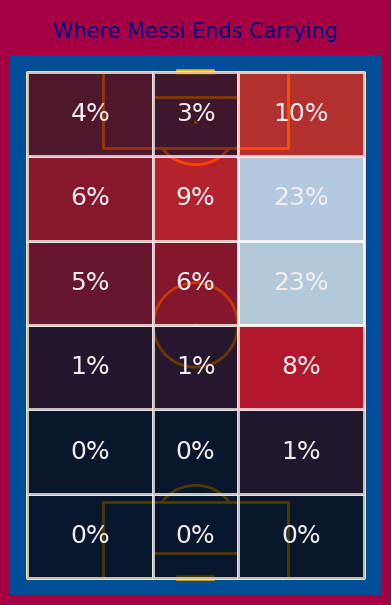

In [28]:
# extracting all the end points of carry's made during his initial years
heatmap(iyCarry,"carryEnd", "Where Messi Ends Carrying")

In [29]:
# scatter plot of the places where Messi has made a successful, unsuccessful, nutmegs across the pitch
iyDribbles = initialYears[initialYears['type']=="Dribble"]
iyASDribbles = iyDribbles[iyDribbles['dribble_outcome']=='Complete']
iyNDribbles = iyASDribbles[iyASDribbles['dribble_nutmeg']==True]
iySDribbles = iyASDribbles[iyASDribbles['dribble_nutmeg'].isna()]
iyUDribbles = iyDribbles[iyDribbles['dribble_outcome']=='Incomplete']

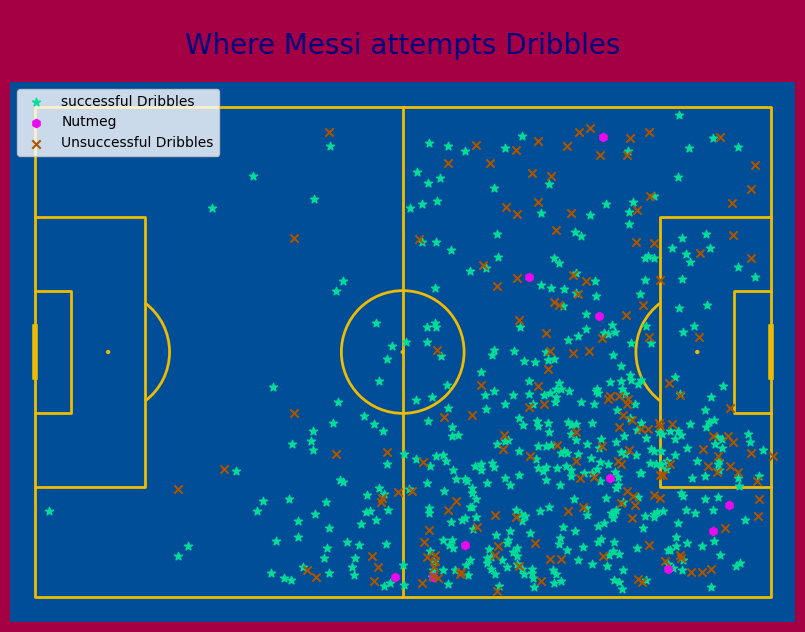

In [30]:
drib(iySDribbles,iyNDribbles,iyUDribbles,"Where Messi attempts Dribbles")

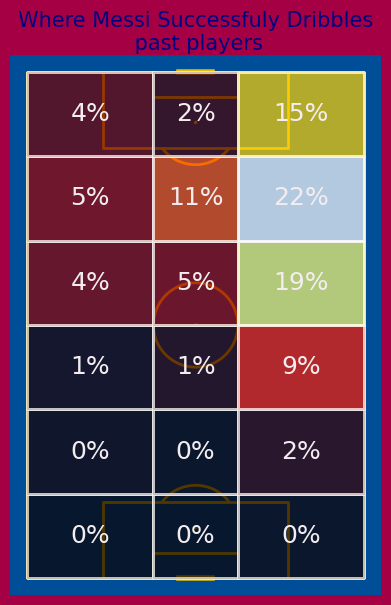

In [31]:
# heat mpa showing the places where Messi has made most of the dribbles
heatmap(iyASDribbles,"dribble","Where Messi Successfuly Dribbles\n past players")

### Passing

In [32]:
# extracting all the passing information
passesIY = initialYears[initialYears['type']=='Pass']
sPIY = passesIY[passesIY['pass_outcome'].isna()]

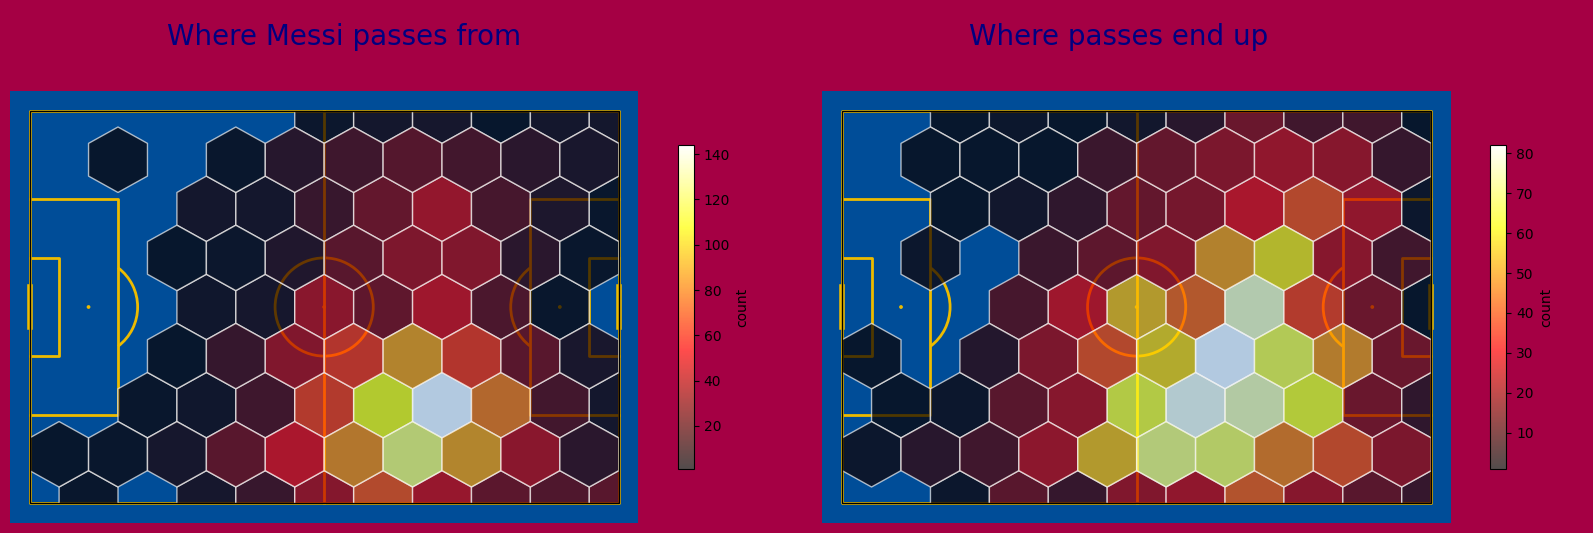

In [33]:
# plotting a heatmap of the areas from where Messi is passing the ball and the areas to which he is passing the ball to
hexbin(sPIY,"Where Messi passes from","Where passes end up")

In [34]:
# top recipients of Messi's passes
iyTopRecip = sPIY['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)
iyTopRecip

,player_name,counts
0,Xavier Hernández Creus,354
1,Anderson Luís de Souza,297
2,Ronaldo de Assis Moreira,284
3,Andrés Iniesta Luján,160
4,Samuel Eto''o Fils,157


### Playmaking

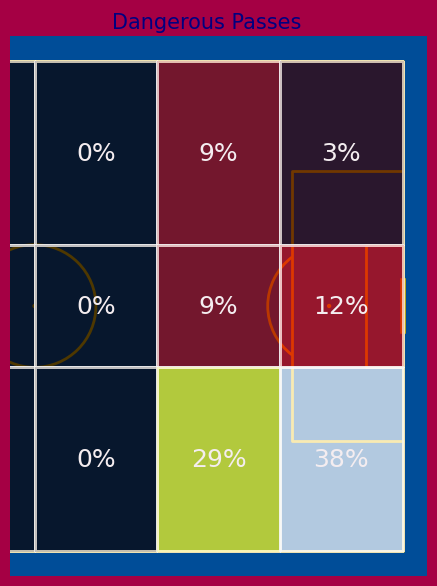

In [35]:
# plotting the dangerous passes made by Messi leading to goal scoring situations
dangerPass(sPIY,"p","Dangerous Passes")

#### Assists

In [36]:
# extracting all the assist information made by Messi
iyAssists = initialYears[initialYears['pass_goal_assist']==True]

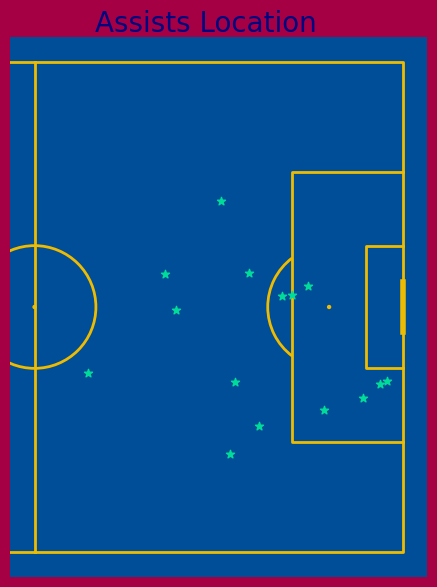

In [37]:
# creating a scatter plot of all the locations from where Messi has made assist
scatter(iyAssists,"assists","Assists Location")

In [38]:
# extrating all the players recieving assist from messi
iyGAssisted = iyAssists['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts')

In [39]:
# top 5 players to whom Messi has assisted the most
iyGAssisted.head(5)

,player_name,counts
0,Samuel Eto''o Fils,6
1,Thierry Henry,3
2,Giovani dos Santos Ramírez,2
3,Carles Puyol i Saforcada,1
4,Bojan Krkíc Pérez,1


In [40]:
# extracting all the set piece information
iySPAssists = iyAssists[iyAssists['pass_type'].isin(setpiece)]

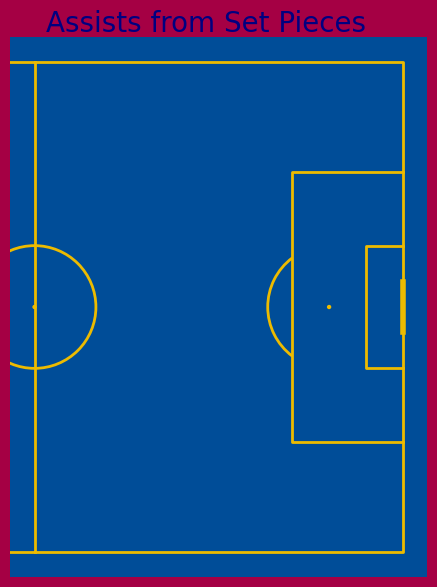

In [41]:
scatter(iySPAssists,"assists","Assists from Set Pieces")

### Goal Scoring

In [42]:
# extracting all the data related to Messi's goal-scoring during his initial years
iyGoals = initialYears[initialYears['shot_outcome']=='Goal']

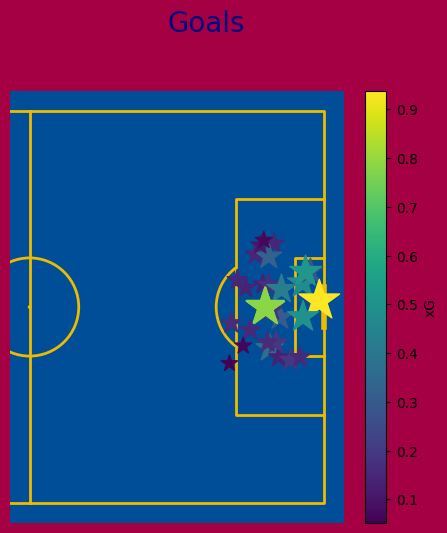

In [43]:
# plotting a scatter plot of all the positions from where Messi has scored goals from
scatter(iyGoals,"goals","Goals")

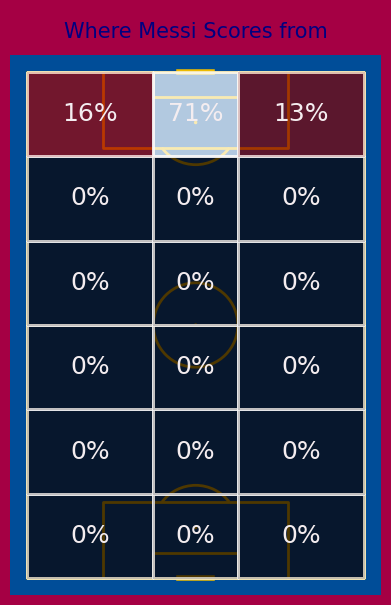

In [44]:
# heatmap depicting areas from where Messi has scored from
heatmap(iyGoals,"goal","Where Messi Scores from")

In [45]:
# extracting all the goals scored from set pieces
iySPGoal = iyGoals[iyGoals['shot_type'].isin(setpiece)]

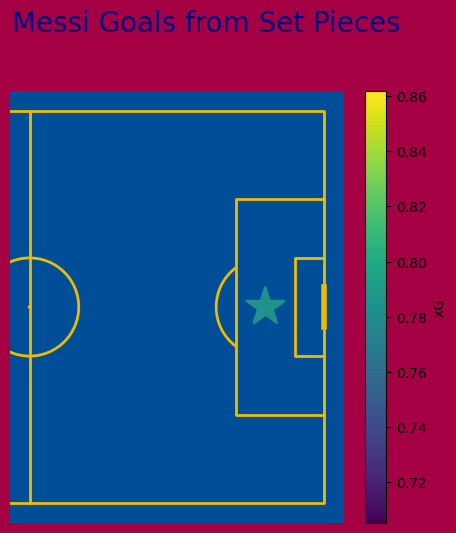

In [46]:
# scatter plot showing all the goals sored from set pieces
scatter(iySPGoal,"goals","Messi Goals from Set Pieces")

## European Dominance
## Analyzing all the plots and stats for the overall data for Messi

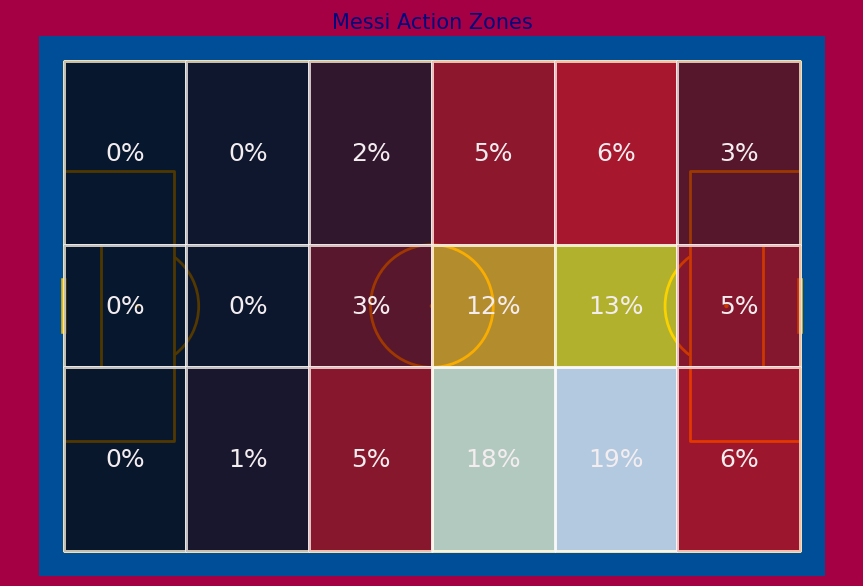

In [47]:
heatmap(pepYears,"all","Messi Action Zones")

### Movement

In [48]:
pyCarry = pepYears[pepYears['type']=='Carry']

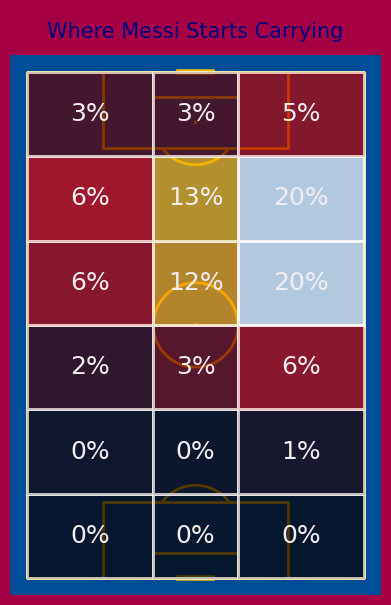

In [49]:
heatmap(pyCarry,"carryStart", "Where Messi Starts Carrying")

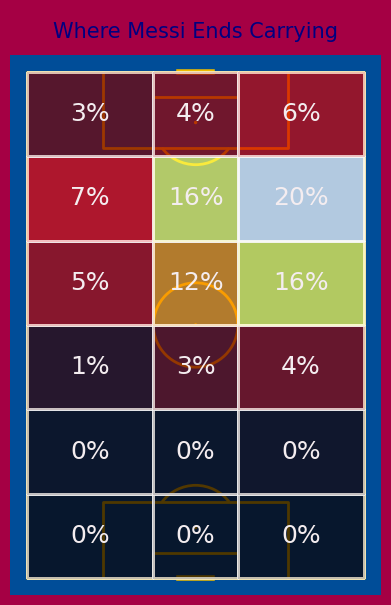

In [50]:
heatmap(pyCarry,"carryEnd", "Where Messi Ends Carrying")

In [51]:
pyDribbles = pepYears[pepYears['type']=="Dribble"]
pyASDribbles = pyDribbles[pyDribbles['dribble_outcome']=='Complete']
pyNDribbles = pyASDribbles[pyASDribbles['dribble_nutmeg']==True]
pySDribbles = pyASDribbles[pyASDribbles['dribble_nutmeg'].isna()]
pyUDribbles = pyDribbles[pyDribbles['dribble_outcome']=='Incomplete']

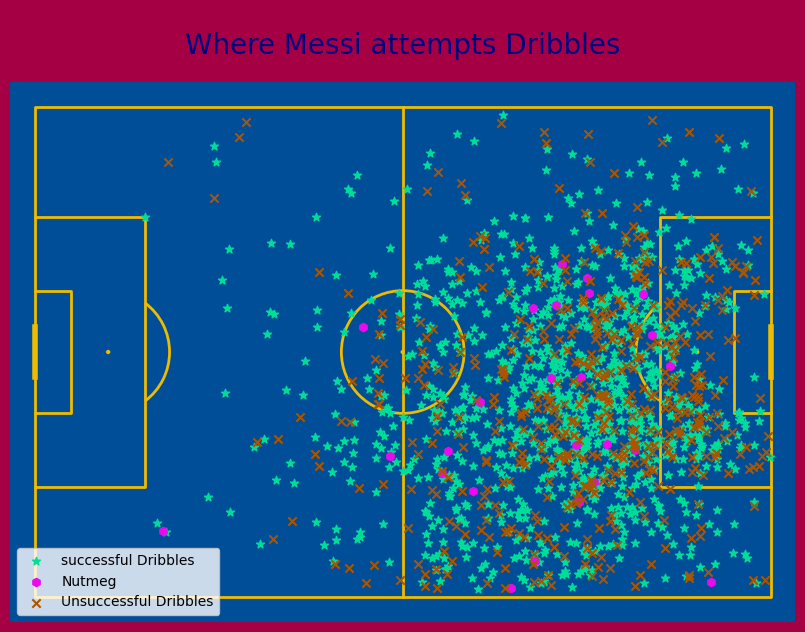

In [52]:
drib(pySDribbles,pyNDribbles,pyUDribbles,"Where Messi attempts Dribbles")

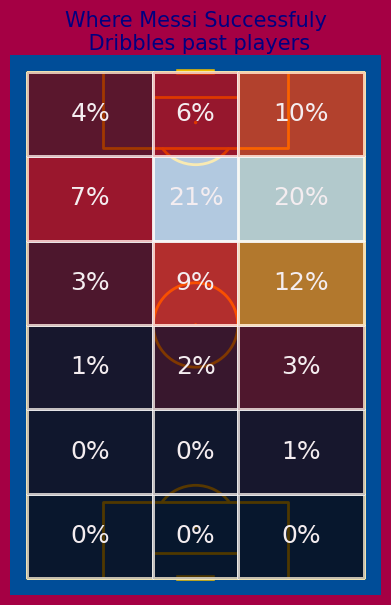

In [53]:
heatmap(pyASDribbles,"dribble","Where Messi Successfuly\n Dribbles past players")

### Passing

In [54]:
passesPY = pepYears[pepYears['type']=='Pass']
sPPY = passesPY[passesPY['pass_outcome'].isna()]

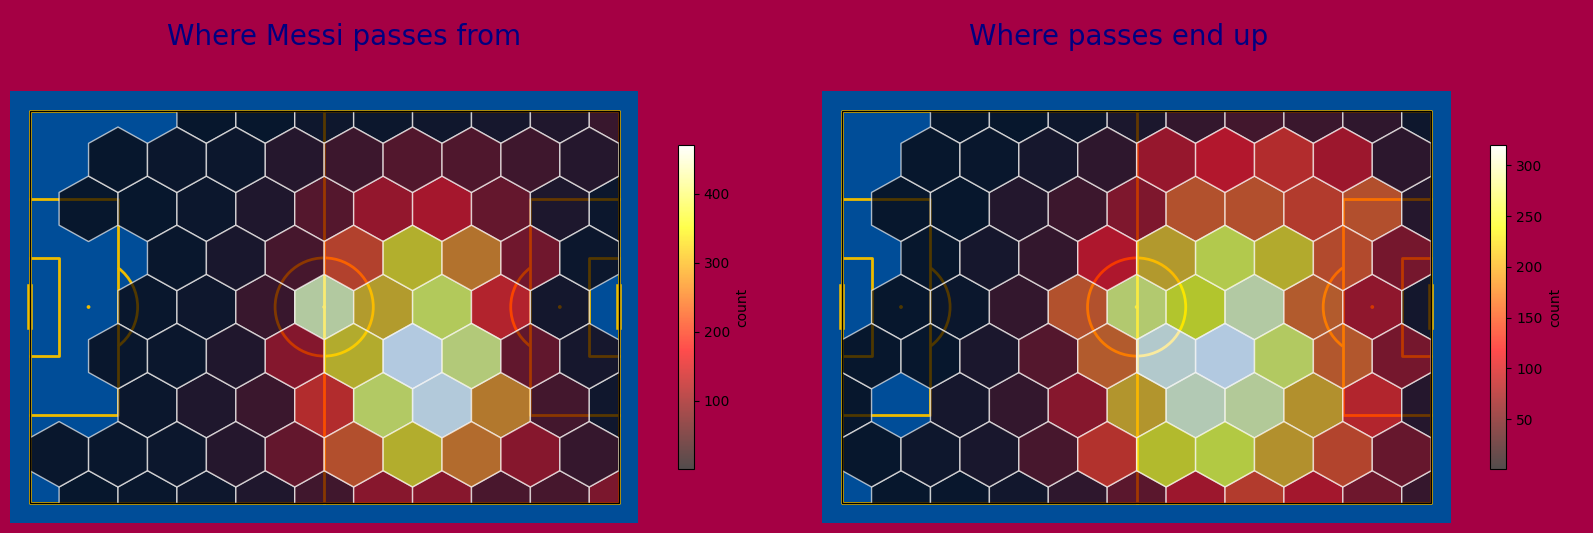

In [55]:
hexbin(sPPY,"Where Messi passes from","Where passes end up")

In [56]:
syTopRecip = sPPY['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)
syTopRecip

,player_name,counts
0,Xavier Hernández Creus,1640
1,Daniel Alves da Silva,1360
2,Andrés Iniesta Luján,1076
3,Sergio Busquets i Burgos,653
4,Francesc Fàbregas i Soler,406


### Playmaking

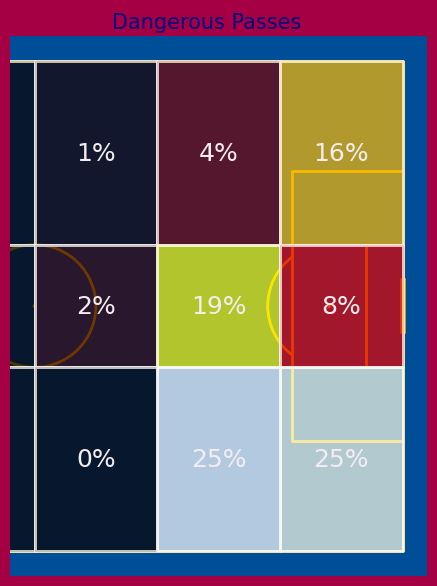

In [57]:
dangerPass(sPPY,"p","Dangerous Passes")

#### Assists

In [58]:
pyAssists = pepYears[pepYears['pass_goal_assist']==True]

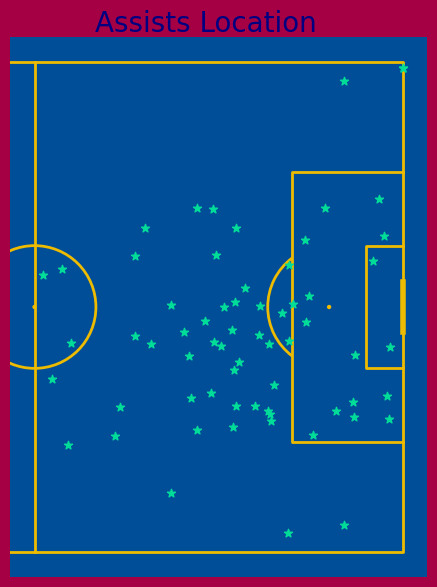

In [59]:
scatter(pyAssists,"assists","Assists Location")

In [60]:
pyGAssisted = pyAssists['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)

In [61]:
pyGAssisted

,player_name,counts
0,David Villa Sánchez,10
1,Pedro Eliezer Rodríguez Ledesma,9
2,Samuel Eto''o Fils,6
3,Francesc Fàbregas i Soler,5
4,Thiago Alcântara do Nascimento,4


In [62]:
pySPAssists = pyAssists[pyAssists['pass_type'].isin(setpiece)]

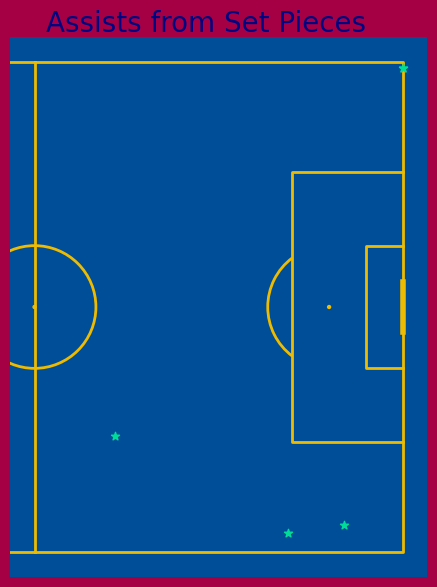

In [63]:
scatter(pySPAssists,"assists","Assists from Set Pieces")

### Goal Scoring

In [64]:
pyGoals = pepYears[pepYears['shot_outcome']=='Goal']

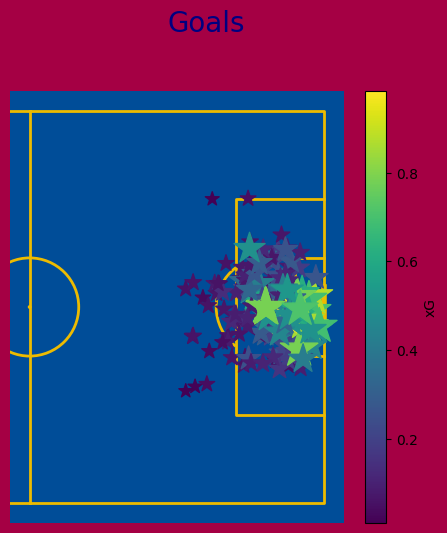

In [65]:
scatter(pyGoals,"goals","Goals")

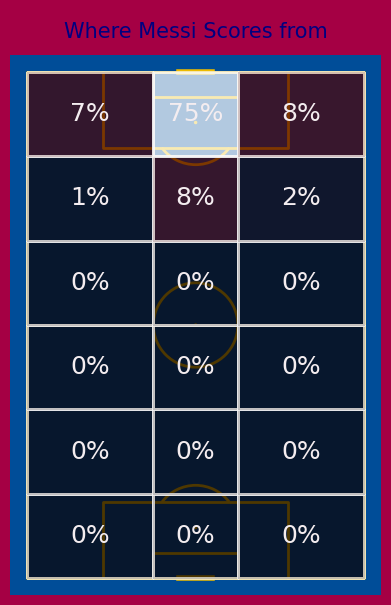

In [66]:
heatmap(pyGoals,"goal","Where Messi Scores from")

In [67]:
pySPGoal = pyGoals[pyGoals['shot_type'].isin(setpiece)]

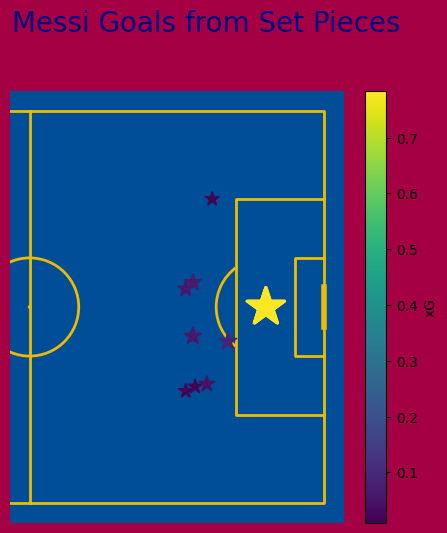

In [68]:
scatter(pySPGoal,"goals","Messi Goals from Set Pieces")

## Greatest Front Three

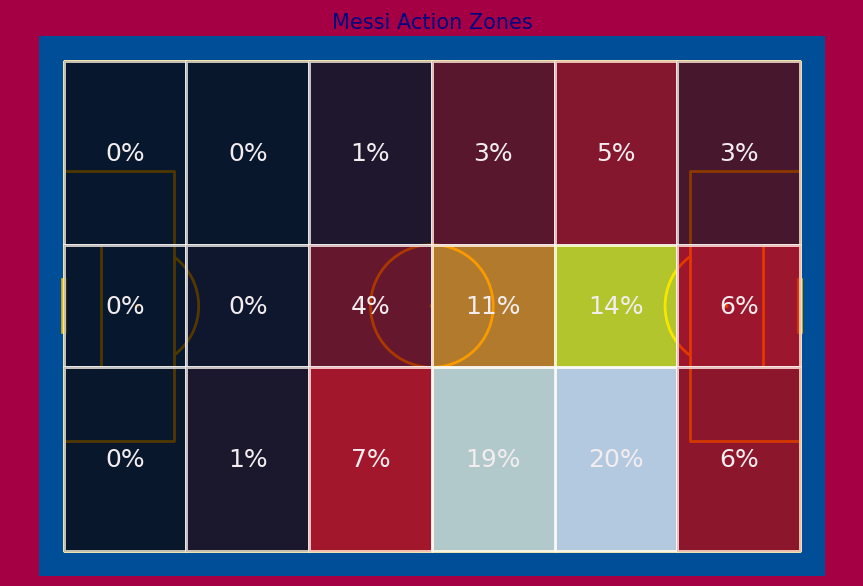

In [69]:
heatmap(msnYears,"all","Messi Action Zones")

### Movement

In [70]:
myCarry = msnYears[msnYears['type']=='Carry']

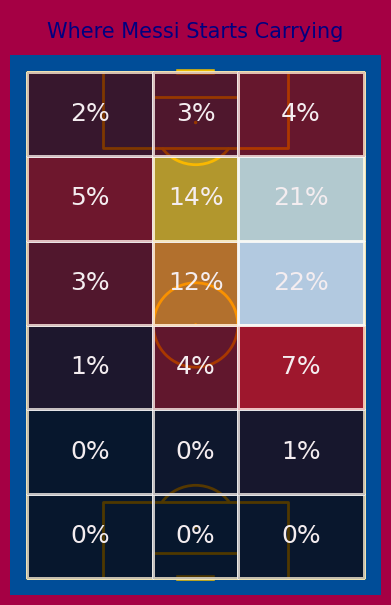

In [71]:
heatmap(myCarry,"carryStart", "Where Messi Starts Carrying")

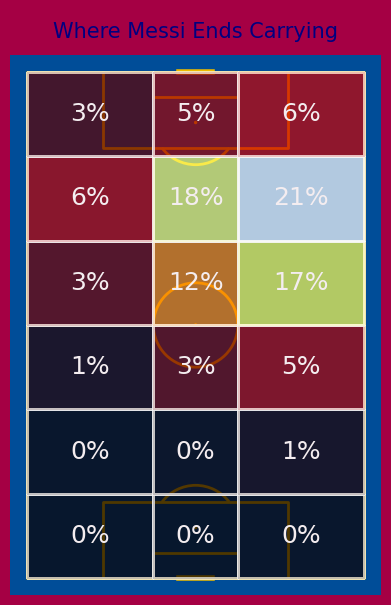

In [72]:
heatmap(myCarry,"carryEnd", "Where Messi Ends Carrying")

In [73]:
myDribbles = msnYears[msnYears['type']=="Dribble"]
myASDribbles = myDribbles[myDribbles['dribble_outcome']=='Complete']
myNDribbles = myASDribbles[myASDribbles['dribble_nutmeg']==True]
mySDribbles = myASDribbles[myASDribbles['dribble_nutmeg'].isna()]
myUDribbles = myDribbles[myDribbles['dribble_outcome']=='Incomplete']

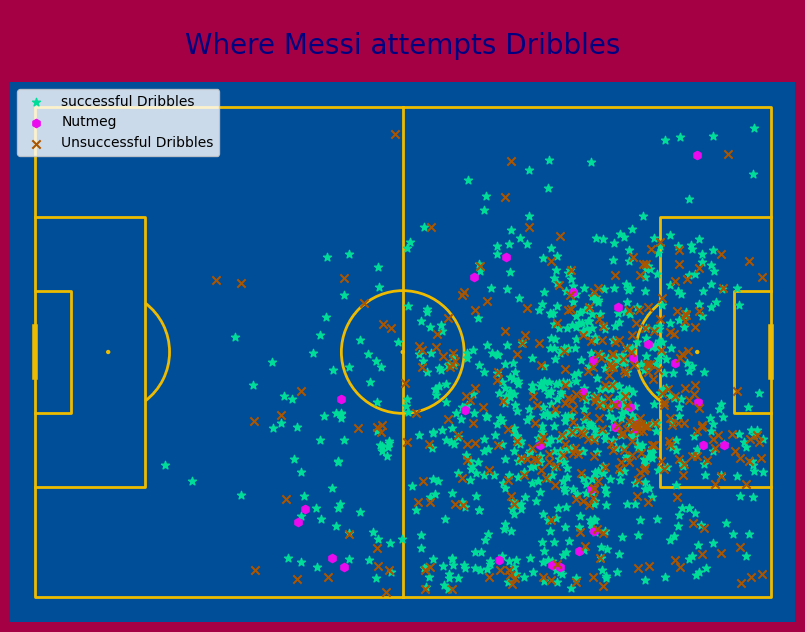

In [74]:
drib(mySDribbles,myNDribbles,myUDribbles,"Where Messi attempts Dribbles")

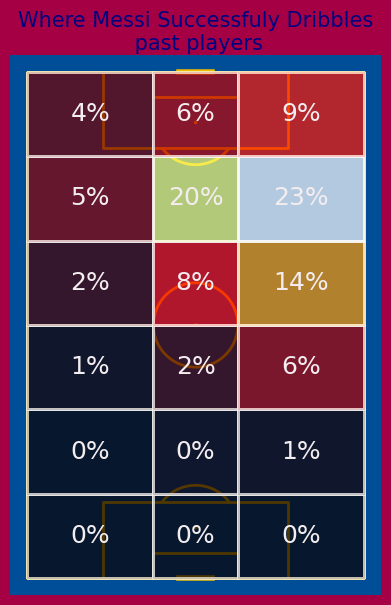

In [75]:
heatmap(myASDribbles,"dribble","Where Messi Successfuly Dribbles\n past players")

### Passing

In [76]:
passesMY = msnYears[msnYears['type']=='Pass']
sPMY = passesMY[passesMY['pass_outcome'].isna()]

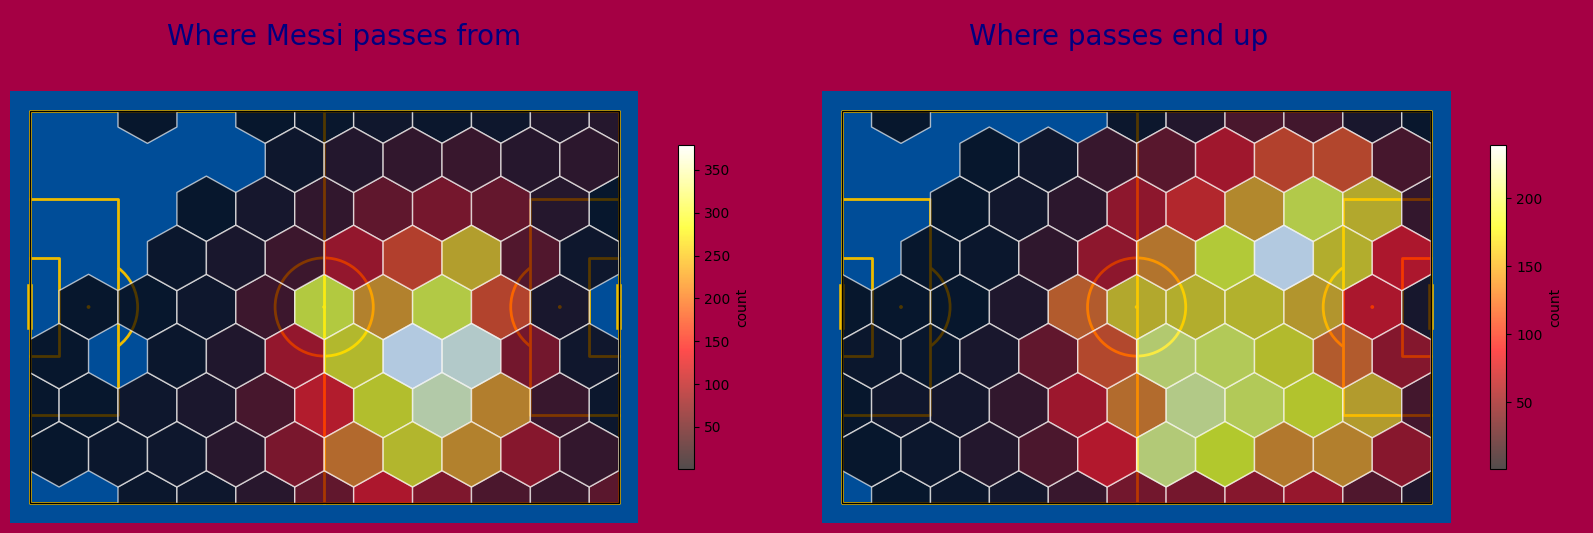

In [77]:
hexbin(sPMY,"Where Messi passes from","Where passes end up")

In [78]:
myTopRecip = sPMY['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)
myTopRecip

,player_name,counts
0,Daniel Alves da Silva,695
1,Neymar da Silva Santos Junior,688
2,Sergio Busquets i Burgos,628
3,Andrés Iniesta Luján,595
4,Ivan Rakitić,506


### Playmaking

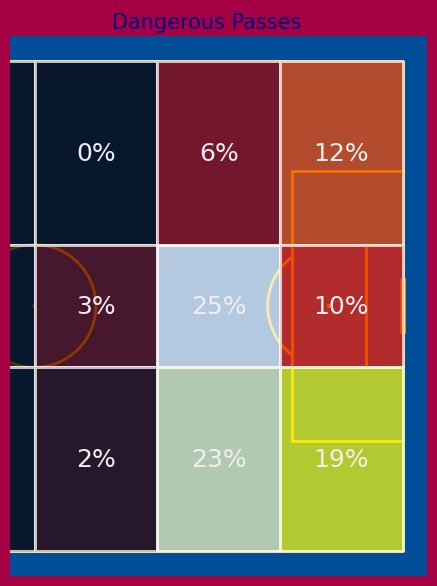

In [79]:
dangerPass(sPMY,"p","Dangerous Passes")

#### Assists

In [80]:
myAssists = msnYears[msnYears['pass_goal_assist']==True]

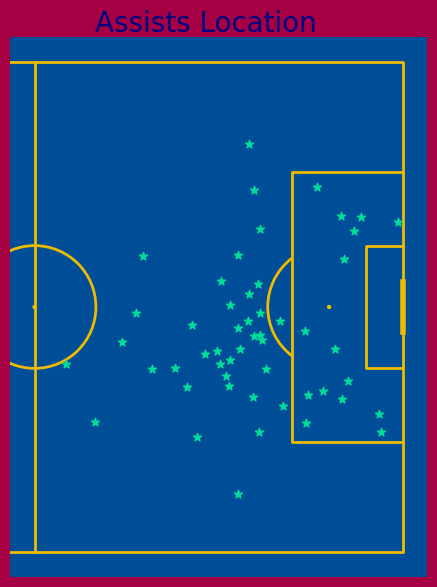

In [81]:
scatter(myAssists,"assists","Assists Location")

In [82]:
myGAssisted = myAssists['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)

In [83]:
myGAssisted

,player_name,counts
0,Luis Alberto Suárez Díaz,16
1,Neymar da Silva Santos Junior,12
2,Ivan Rakitić,5
3,Pedro Eliezer Rodríguez Ledesma,4
4,Alexis Alejandro Sánchez Sánchez,4


In [84]:
mySPAssists = myAssists[myAssists['pass_type'].isin(setpiece)]

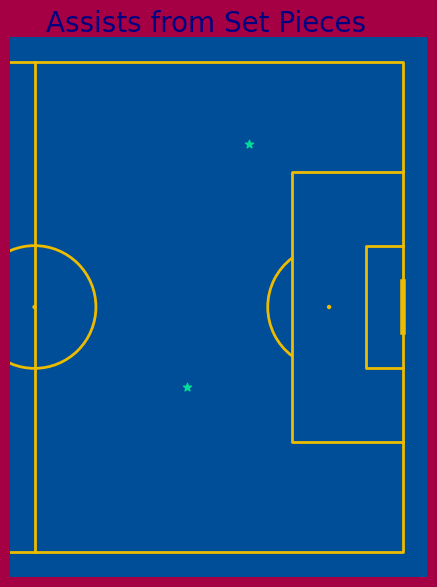

In [85]:
scatter(mySPAssists,"assists","Assists from Set Pieces")

### Goal Scoring

In [86]:
myGoals = msnYears[msnYears['shot_outcome']=='Goal']

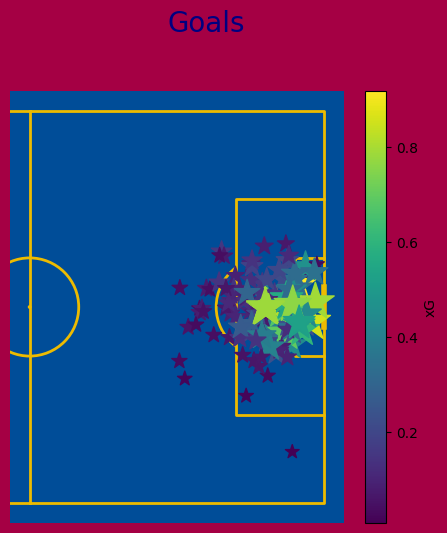

In [87]:
scatter(myGoals,"goals","Goals")

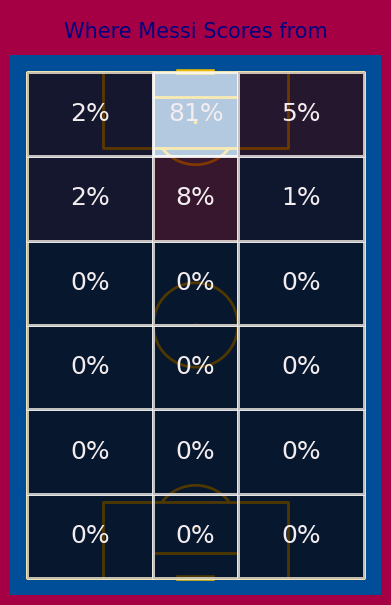

In [88]:
heatmap(myGoals,"goal","Where Messi Scores from")

In [89]:
mySPGoal = myGoals[myGoals['shot_type'].isin(setpiece)]

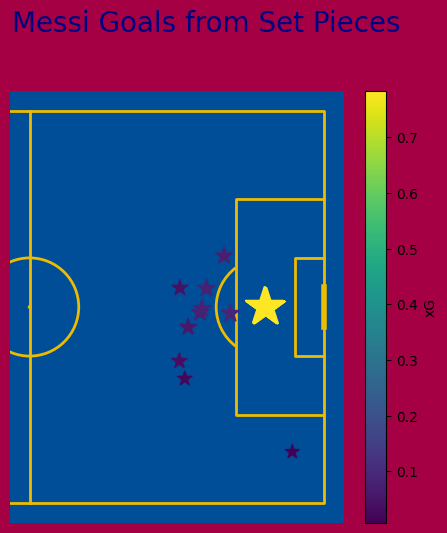

In [90]:
scatter(mySPGoal,"goals","Messi Goals from Set Pieces")

## Swan Song

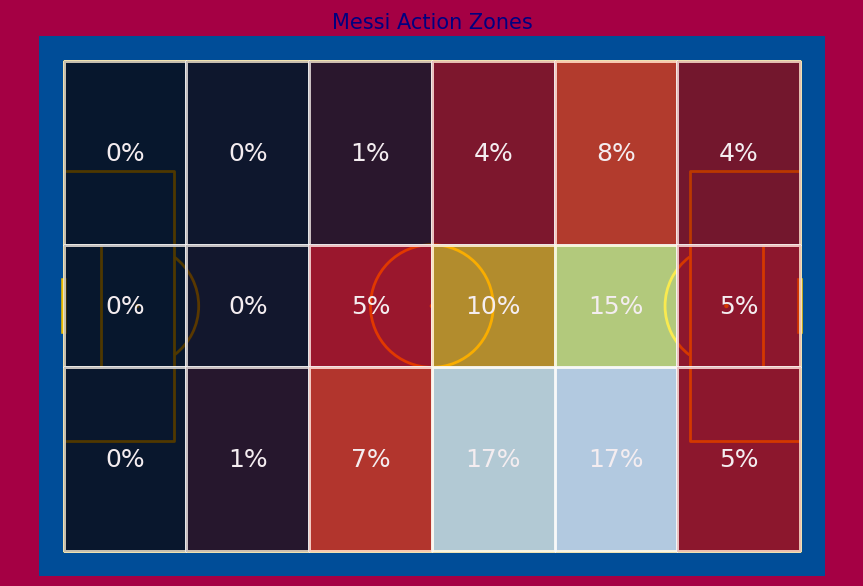

In [91]:
heatmap(swanSong,"all","Messi Action Zones")

### Movement

In [92]:
syCarry = swanSong[swanSong['type']=='Carry']

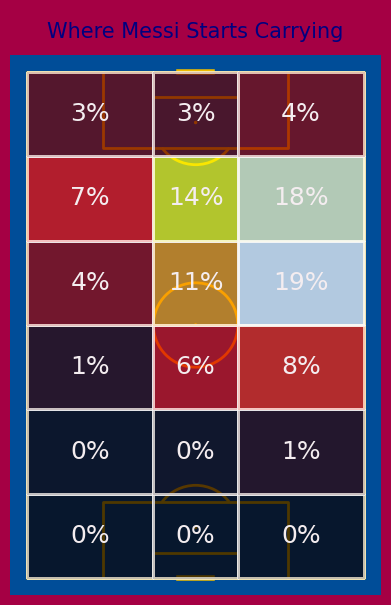

In [93]:
heatmap(syCarry,"carryStart", "Where Messi Starts Carrying")

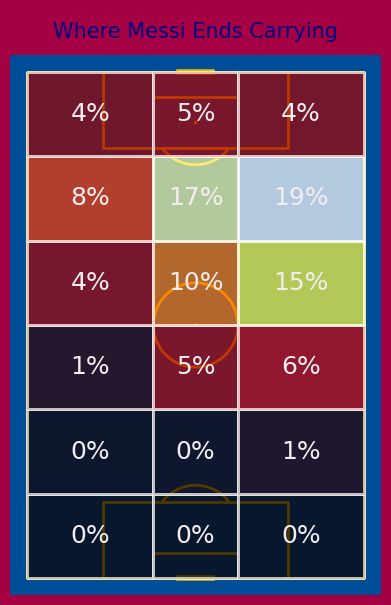

In [94]:
heatmap(syCarry,"carryEnd", "Where Messi Ends Carrying")

In [95]:
syDribbles = swanSong[swanSong['type']=="Dribble"]
syASDribbles = syDribbles[syDribbles['dribble_outcome']=='Complete']
syNDribbles = syASDribbles[syASDribbles['dribble_nutmeg']==True]
sySDribbles = syASDribbles[syASDribbles['dribble_nutmeg'].isna()]
syUDribbles = syDribbles[syDribbles['dribble_outcome']=='Incomplete']

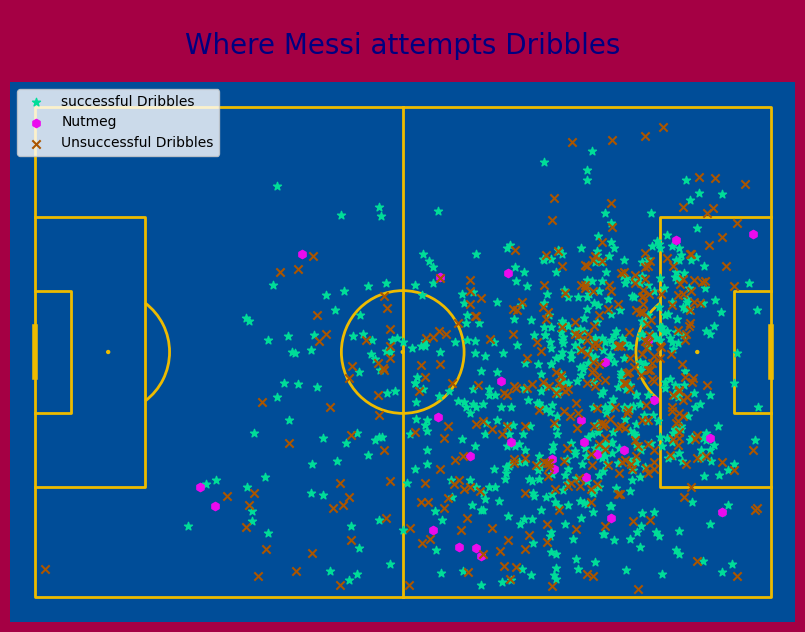

In [96]:
drib(sySDribbles,syNDribbles,syUDribbles,"Where Messi attempts Dribbles")

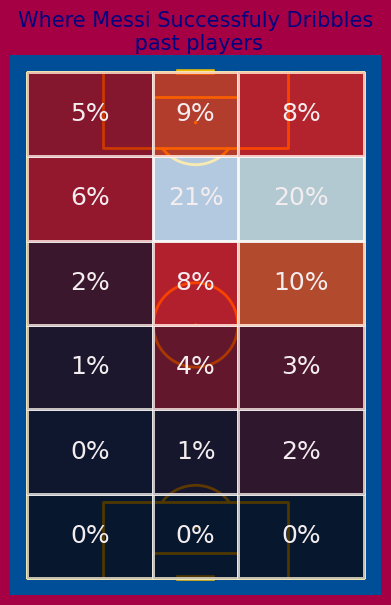

In [97]:
heatmap(syASDribbles,"dribble","Where Messi Successfuly Dribbles\n past players")

### Passing

In [98]:
passesSY = swanSong[swanSong['type']=='Pass']
sPSY = passesSY[passesSY['pass_outcome'].isna()]

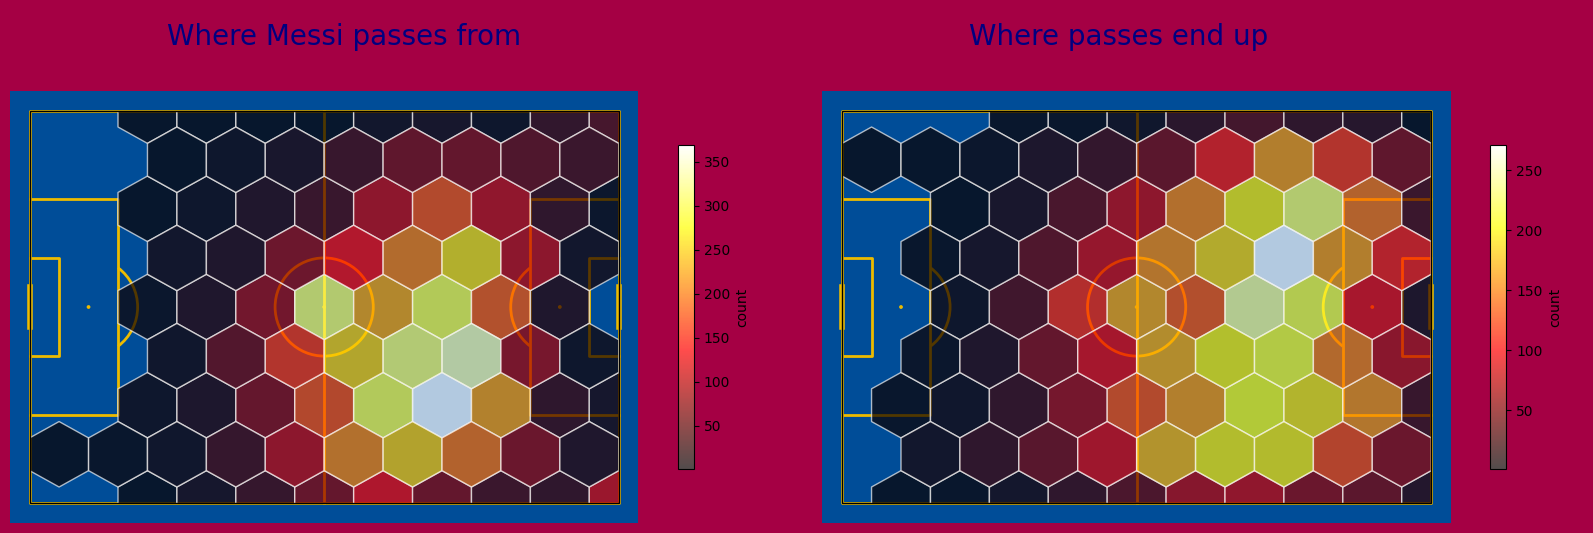

In [99]:
hexbin(sPSY,"Where Messi passes from","Where passes end up")

In [100]:
syTopRecip = sPSY['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)
syTopRecip

,player_name,counts
0,Sergio Busquets i Burgos,728
1,Sergi Roberto Carnicer,584
2,Jordi Alba Ramos,578
3,Ivan Rakitić,536
4,Luis Alberto Suárez Díaz,441


### Playmaking

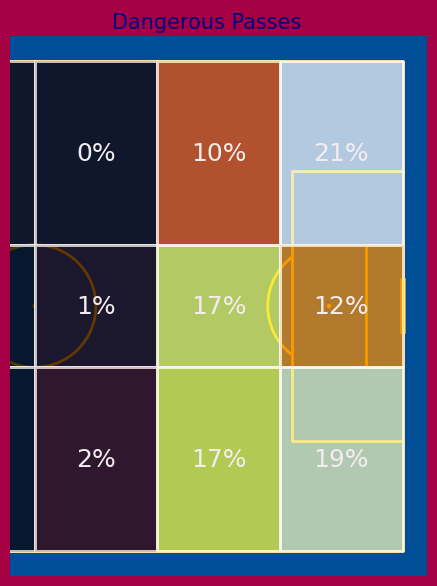

In [101]:
dangerPass(sPSY,"p","Dangerous Passes")

#### Assists

In [102]:
syAssists = swanSong[swanSong['pass_goal_assist']==True]

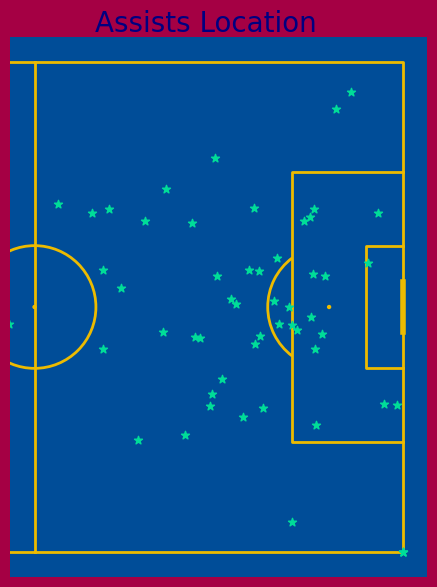

In [103]:
scatter(syAssists,"assists","Assists Location")

In [104]:
syGAssisted = syAssists['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)

In [105]:
syGAssisted

,player_name,counts
0,Luis Alberto Suárez Díaz,14
1,Jordi Alba Ramos,5
2,Antoine Griezmann,4
3,Gerard Piqué Bernabéu,3
4,Ousmane Dembélé,3


In [106]:
sySPAssists = syAssists[syAssists['pass_type'].isin(setpiece)]

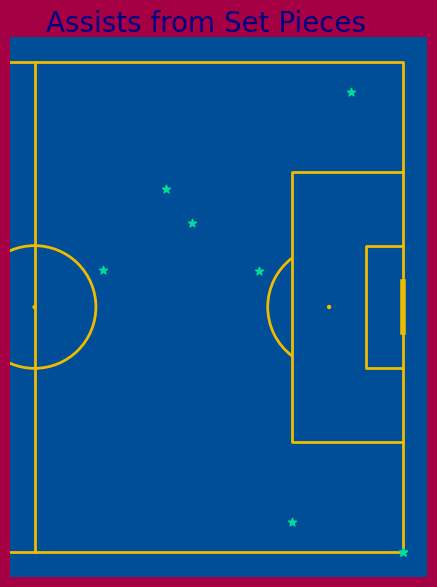

In [107]:
scatter(sySPAssists,"assists","Assists from Set Pieces")

### Goal Scoring

In [108]:
syGoals = swanSong[swanSong['shot_outcome']=='Goal']

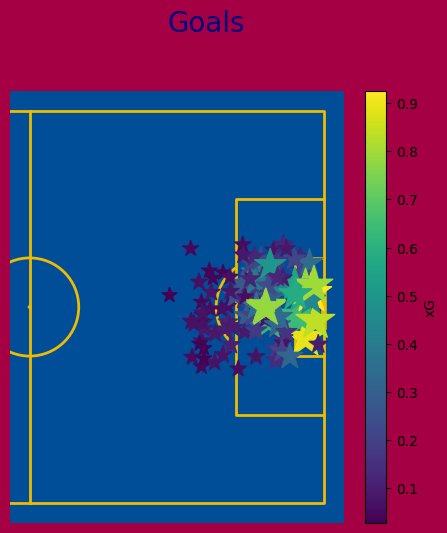

In [109]:
scatter(syGoals,"goals","Goals")

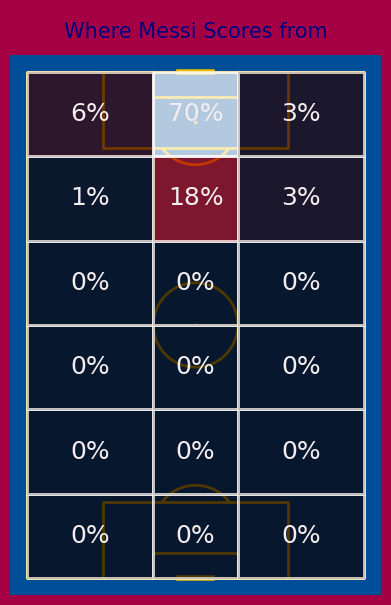

In [110]:
heatmap(syGoals,"goal","Where Messi Scores from")

In [111]:
sySPGoal = syGoals[syGoals['shot_type'].isin(setpiece)]

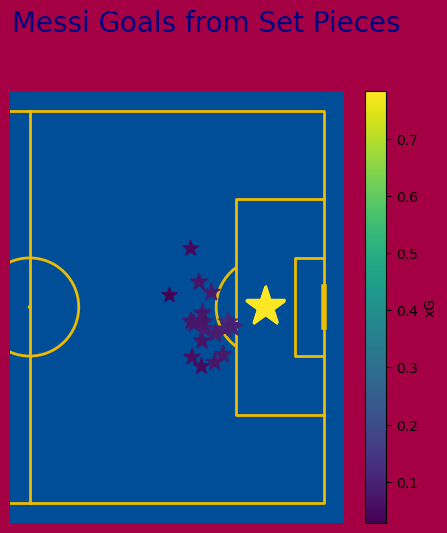

In [112]:
scatter(sySPGoal,"goals","Messi Goals from Set Pieces")

# Juego de Posición (Positional Play)

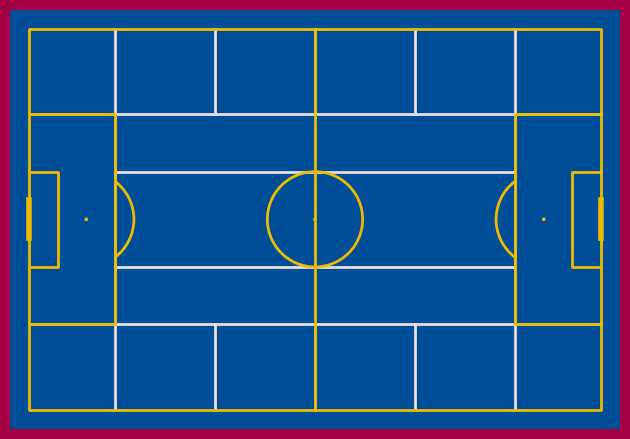

In [113]:
pitch =Pitch(pitch_type='statsbomb',pitch_color='#004d98', line_color='#edbb00',positional=True)
fig, ax = pitch.draw()

fig.set_facecolor('#a50044')

# Evolution

In [114]:
# plotting the average playing location over the years for Messi
avgIYX = avgLoc(initialYears, "x")
avgIYY = avgLoc(initialYears, "y")

avgPYX = avgLoc(pepYears, "x")
avgPYY = avgLoc(pepYears, "y")

avgMYX = avgLoc(msnYears, "x")
avgMYY = avgLoc(msnYears, "y")

avgSYX = avgLoc(swanSong, "x")
avgSYY = avgLoc(swanSong, "y")

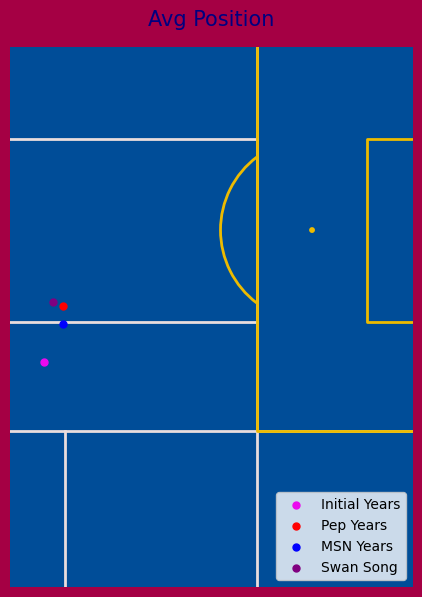

In [115]:
evolution(avgIYX,avgIYY,avgPYX,avgPYY,avgMYX,avgMYY,avgSYX,avgSYY,"Avg Position")

## Movement

In [116]:
# plotting the average movement f Messi with the ball
avgIYCarrySX = avgLoc(iyCarry,"x")
avgIYCarrySY = avgLoc(iyCarry,"y")

avgPYCarrySX = avgLoc(pyCarry,"x")
avgPYCarrySY = avgLoc(pyCarry,"y")

avgMYCarrySX = avgLoc(myCarry,"x")
avgMYCarrySY = avgLoc(myCarry,"y")

avgSYCarrySX = avgLoc(syCarry,"x")
avgSYCarrySY = avgLoc(syCarry,"y")

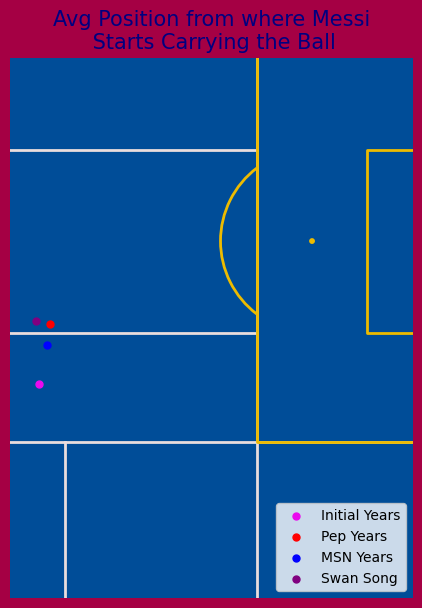

In [117]:
evolution(avgIYCarrySX,avgIYCarrySY,avgPYCarrySX,avgPYCarrySY,avgMYCarrySX,avgMYCarrySY,avgSYCarrySX,avgSYCarrySY,
          "Avg Position from where Messi\n Starts Carrying the Ball")

In [118]:
# average position where Messi finishes his dribbling
avgIYCarryEX = avgLoc(iyCarry,"xcend")
avgIYCarryEY = avgLoc(iyCarry,"ycend")

avgPYCarryEX = avgLoc(pyCarry,"xcend")
avgPYCarryEY = avgLoc(pyCarry,"ycend")

avgMYCarryEX = avgLoc(myCarry,"xcend")
avgMYCarryEY = avgLoc(myCarry,"ycend")

avgSYCarryEX = avgLoc(syCarry,"xcend")
avgSYCarryEY = avgLoc(syCarry,"ycend")

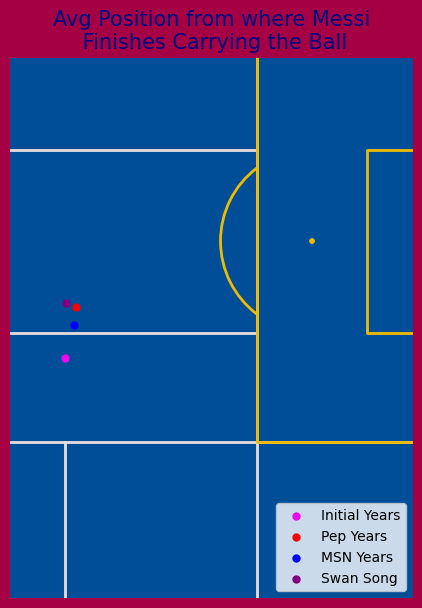

In [119]:
evolution(avgIYCarryEX,avgIYCarryEY,avgPYCarryEX,avgPYCarryEY,avgMYCarryEX,avgMYCarryEY,avgSYCarryEX,avgSYCarryEY,
          "Avg Position from where Messi\n Finishes Carrying the Ball")

In [120]:
# calculating the average carry length in different phases of his career
avgIYCLength = round(math.dist([avgIYCarrySX,avgIYCarrySY],[avgIYCarryEX,avgIYCarryEY]),3)
avgPYCLength = round(math.dist([avgPYCarrySX,avgPYCarrySY],[avgPYCarryEX,avgPYCarryEY]),3)
avgMYCLength = round(math.dist([avgMYCarrySX,avgMYCarrySY],[avgMYCarryEX,avgMYCarryEY]),3)
avgSYCLength = round(math.dist([avgSYCarrySX,avgSYCarrySY],[avgSYCarryEX,avgSYCarryEY]),3)

In [121]:
# converting the results to a data frame
Era = ["Initial Years", "Pep Years", "MSN Years", "Swan Song"]
avgCLength = [avgIYCLength,avgPYCLength,avgMYCLength,avgSYCLength]

cLDict = {'Era': Era, "Avg Carry Length": avgCLength}

carryLength = pd.DataFrame(cLDict)

In [122]:
carryLength

,Era,Avg Carry Length
0,Initial Years,4.033
1,Pep Years,3.387
2,MSN Years,3.698
3,Swan Song,3.779


In [123]:
# average location for the successful dribbles
avgIYDribbleX = avgLoc(iyASDribbles,"x")
avgIYDribbleY = avgLoc(iyASDribbles,"y")

avgPYDribbleX = avgLoc(pyASDribbles,"x")
avgPYDribbleY = avgLoc(pyASDribbles,"y")

avgMYDribbleX = avgLoc(myASDribbles,"x")
avgMYDribbleY = avgLoc(myASDribbles,"y")

avgSYDribbleX = avgLoc(syASDribbles,"x")
avgSYDribbleY = avgLoc(syASDribbles,"y")

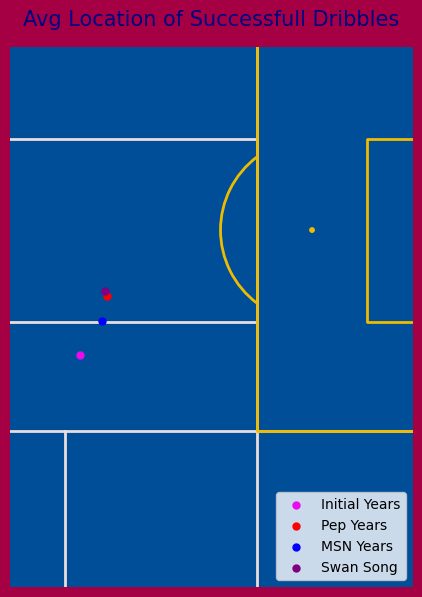

In [124]:
evolution(avgIYDribbleX,avgIYDribbleY,avgPYDribbleX,avgPYDribbleY,avgMYDribbleX,avgMYDribbleY,avgSYDribbleX,avgSYDribbleY,
          "Avg Location of Successfull Dribbles")

## Passing

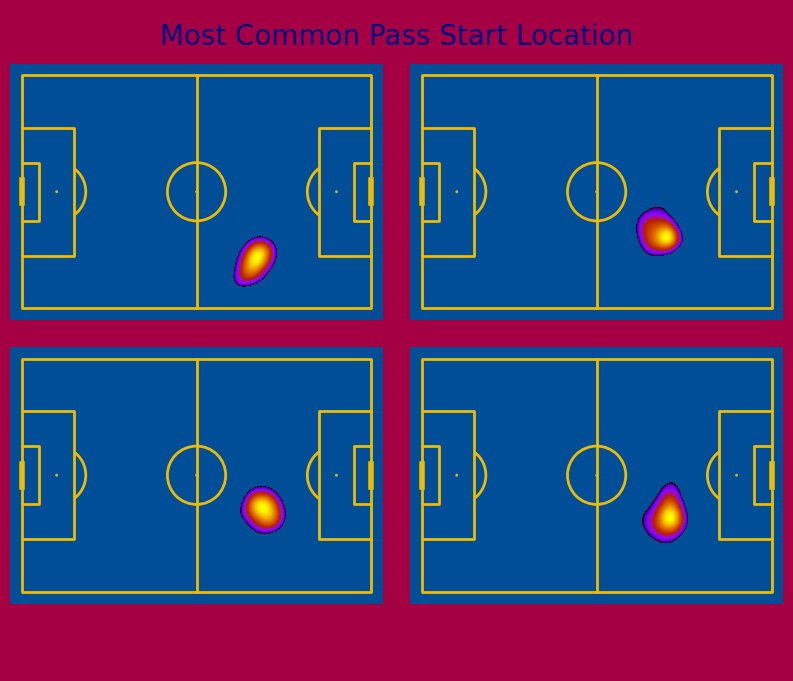

In [125]:
# most common area of passes under different managers (start Location)
kdePlot(sPIY,sPPY,sPMY,sPSY,"s","Most Common Pass Start Location")

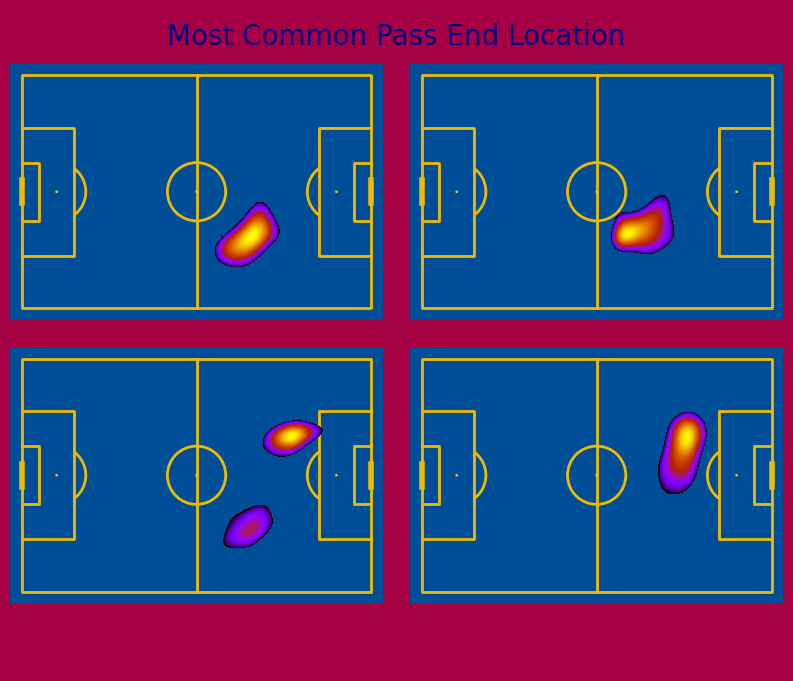

In [126]:
# most common area of passes under different managers (end Location)
kdePlot(sPIY,sPPY,sPMY,sPSY,"e","Most Common Pass End Location")

In [127]:
avgIYSPassSX = avgLoc(sPIY,"x")
avgIYSPassSY = avgLoc(sPIY,"y")

avgPYSPassSX = avgLoc(sPPY,"x")
avgPYSPassSY = avgLoc(sPPY,"y")

avgMYSPassSX = avgLoc(sPMY,"x")
avgMYSPassSY = avgLoc(sPMY,"y")

avgSYSPassSX = avgLoc(sPSY,"x")
avgSYSPassSY = avgLoc(sPSY,"y")

In [128]:
avgIYPassEX = avgLoc(sPIY,"xend")
avgIYPassEY = avgLoc(sPIY,"yend")

avgPYPassEX = avgLoc(sPPY,"xend")
avgPYPassEY = avgLoc(sPPY,"yend")

avgMYPassEX = avgLoc(sPMY,"xend")
avgMYPassEY = avgLoc(sPMY,"yend")

avgSYPassEX = avgLoc(sPSY,"xend")
avgSYPassEY = avgLoc(sPSY,"yend")

In [129]:
# calculating the average pass length under different managers
avgIYSPLength = round(math.dist([avgIYSPassSX,avgIYSPassSY],[avgIYPassEX,avgIYPassEY]),3)
avgPYSPLength = round(math.dist([avgPYSPassSX,avgPYSPassSY],[avgPYPassEX,avgPYPassEY]),3)
avgMYSPLength = round(math.dist([avgMYSPassSX,avgMYSPassSY],[avgMYPassEX,avgMYPassEY]),3)
avgSYSPLength = round(math.dist([avgSYSPassSX,avgSYSPassSY],[avgSYPassEX,avgSYPassEY]),3)

In [130]:
# convertning the results into a data frame
avgSPLength = [avgIYSPLength,avgPYSPLength,avgMYSPLength,avgSYSPLength]

spLDict = {'Era': Era, "Avg Successful Pass Length": avgSPLength}

passLength = pd.DataFrame(spLDict)

In [131]:
passLength

,Era,Avg Successful Pass Length
0,Initial Years,5.232
1,Pep Years,2.625
2,MSN Years,5.859
3,Swan Song,5.358


In [132]:
# extracting all the succesfu, unsuccesful passes
uPIY = passesIY[passesIY['pass_outcome'].isna()==False]
uPPY = passesPY[passesPY['pass_outcome'].isna()==False]
uPMY = passesMY[passesMY['pass_outcome'].isna()==False]
uPSY = passesSY[passesSY['pass_outcome'].isna()==False]

In [133]:
# calculating the pass success rate and storing the data in a Data Frame
numSPass = [len(sPIY),len(sPPY),len(sPMY),len(sPSY)]
numUPass = [len(uPIY),len(uPPY),len(uPMY),len(uPSY)]
centSPass = [str(round(len(sPIY)/len(passesIY)*100,1))+'%', str(round(len(sPPY)/len(passesPY)*100,1))+'%',
             str(round(len(sPMY)/len(passesMY)*100,1))+'%', str(round(len(sPSY)/len(passesSY)*100,1))+'%']

pNDict = {'Era': Era, "Num Successful Pass": numSPass, "Num Unsuccessful Pass": numUPass,"Percentage Successful Pass":centSPass}

passPercentage = pd.DataFrame(pNDict)

In [134]:
passPercentage

,Era,Num Successful Pass,Num Unsuccessful Pass,Percentage Successful Pass
0,Initial Years,1951,416,82.4%
1,Pep Years,8075,1656,83.0%
2,MSN Years,6147,1461,80.8%
3,Swan Song,6751,1712,79.8%


In [135]:
# Filtering the players recieving most number of passes from Messi
passes = eventsMessi[eventsMessi['type']=='Pass']
sPasses = passes[passes['pass_outcome'].isna()]
topRecip = sPasses['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)

In [136]:
topRecip

,player_name,counts
0,Xavier Hernández Creus,2361
1,Daniel Alves da Silva,2055
2,Sergio Busquets i Burgos,2009
3,Andrés Iniesta Luján,1995
4,Ivan Rakitić,1042


## Playmaking

In [137]:
# extracting all the danger passes leading to goal in different eras
dangerPIY = dangerPass(sPIY,"c","d")
dangerPPY = dangerPass(sPPY,"c","d")
dangerPMY = dangerPass(sPMY,"c","d")
dangerPSY = dangerPass(sPSY,"c","d")

In [138]:
avgIYDPassSX = avgLoc(dangerPIY,"x")
avgIYDPassSY = avgLoc(dangerPIY,"y")

avgPYDPassSX = avgLoc(dangerPPY,"x")
avgPYDPassSY = avgLoc(dangerPPY,"y")

avgMYDPassSX = avgLoc(dangerPMY,"x")
avgMYDPassSY = avgLoc(dangerPMY,"y")

avgSYDPassSX = avgLoc(dangerPSY,"x")
avgSYDPassSY = avgLoc(dangerPSY,"y")

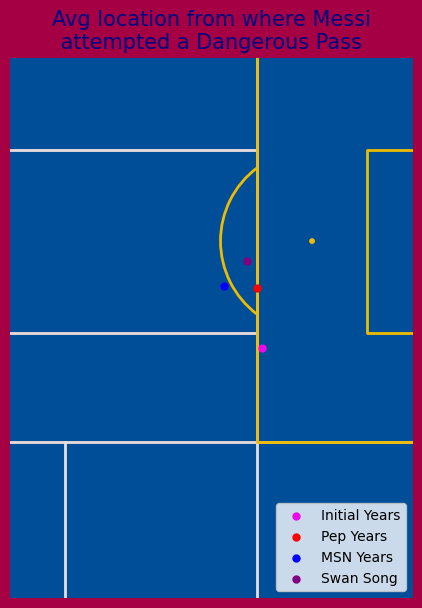

In [139]:
# plotting the data using a scatter plot
evolution(avgIYDPassSX,avgIYDPassSY,avgPYDPassSX,avgPYDPassSY,avgMYDPassSX,avgMYDPassSY,avgSYDPassSX,avgSYDPassSY,
          "Avg location from where Messi\n attempted a Dangerous Pass ")

### Assists

In [140]:
# extractingall the assist info under different eras
iyNumMatch = len(initialYears['match_id'].unique())
pyNumMatch = len(pepYears['match_id'].unique())
myNumMatch = len(msnYears['match_id'].unique())
syNumMatch = len(swanSong['match_id'].unique())

numMatches = [iyNumMatch,pyNumMatch,myNumMatch,syNumMatch]

In [141]:
iyAOB = penaltyBox(iyAssists,'o')
pyAOB = penaltyBox(pyAssists,'o')
myAOB = penaltyBox(myAssists,'o')
syAOB = penaltyBox(syAssists,'o')

In [142]:
# calculating some statistics sucha as Assists per match, percentage of assist from outside the box, assist from inside the box and saving it in a data frame
numAssists = [len(iyAssists),len(pyAssists),len(myAssists),len(syAssists)]

assistsOB = [len(iyAOB),len(pyAOB),len(myAOB),len(syAOB)]

centAOB = [round(len(iyAOB)/len(iyAssists)*100,2),round(len(pyAOB)/len(pyAssists)*100,2),
           round(len(myAOB)/len(myAssists)*100,2),round(len(syAOB)/len(syAssists)*100,2)]

aMatch = [round(len(iyAssists)/(iyNumMatch),2),round(len(pyAssists)/(pyNumMatch),2),
          round(len(myAssists)/(myNumMatch),2),round(len(syAssists)/(syNumMatch),2)]

aDict = {"Era":Era,"Number of Assists":numAssists, "Assists from Outside the Box":assistsOB,
         "Percentage Assists Outside the Box":centAOB,"Number of Matches":numMatches, "Assists Per Match": aMatch}

assists = pd.DataFrame(aDict)

In [143]:
assists

,Era,Number of Assists,Assists from Outside the Box,Percentage Assists Outside the Box,Number of Matches,Assists Per Match
0,Initial Years,15,10,66.67,78,0.19
1,Pep Years,65,49,75.38,168,0.39
2,MSN Years,52,37,71.15,136,0.38
3,Swan Song,54,40,74.07,138,0.39


In [144]:
# players who recieved the most number of assists from Messi
assisted = eventsMessi[eventsMessi['pass_goal_assist']==True]
gSAssisted = assisted['pass_recipient'].value_counts().rename_axis('player_name').reset_index(name='counts').head(5)

In [145]:
gSAssisted

,player_name,counts
0,Luis Alberto Suárez Díaz,30
1,Pedro Eliezer Rodríguez Ledesma,13
2,Neymar da Silva Santos Junior,12
3,Samuel Eto''o Fils,12
4,David Villa Sánchez,10


## Shooting

In [146]:
# extracting the shooting data under different eras
iyShots = initialYears[initialYears['type']=="Shot"]
pyShots = pepYears[pepYears['type']=="Shot"]
myShots = msnYears[msnYears['type']=="Shot"]
syShots = swanSong[swanSong['type']=="Shot"]

In [147]:
iySOB = penaltyBox(iyShots,"o")
pySOB = penaltyBox(pyShots,"o")
mySOB = penaltyBox(myShots,"o")
sySOB = penaltyBox(syShots,"o")

iySB = penaltyBox(iyShots,"in")
pySB = penaltyBox(pyShots,"in")
mySB = penaltyBox(myShots,"in")
sySB = penaltyBox(syShots,"in")

In [148]:
# calculating some stats related to shooting
numShots = [len(iyShots),len(pyShots),len(myShots),len(syShots)]

numShotsBox = [len(iySB),len(pySB),len(mySB),len(sySB)]

numShotsOBox = [len(iySOB),len(pySOB),len(mySOB),len(sySOB)]

centSOB = [round(len(iySOB)/len(iyShots)*100,2),round(len(pySOB)/len(pyShots)*100,2),
           round(len(mySOB)/len(myShots)*100,2),round(len(sySOB)/len(syShots)*100,2)]

sDict = {"Era":Era,"Number of Shots":numShots, "Num Shots Inside Box":numShotsBox,
         "Num Shots Outside Box":numShotsOBox,"'%'Shots Outside Box":centSOB}

shots = pd.DataFrame(sDict)

In [149]:
shots

,Era,Number of Shots,Num Shots Inside Box,Num Shots Outside Box,'%'Shots Outside Box
0,Initial Years,176,113,63,35.80
1,Pep Years,774,515,259,33.46
2,MSN Years,683,427,256,37.48
3,Swan Song,723,349,374,51.73


In [150]:
# extracing the goals data under different eras
iyGB = iyGoals[iyGoals['id'].isin(iySB['id'])]
pyGB = pyGoals[pyGoals['id'].isin(pySB['id'])]
myGB = myGoals[myGoals['id'].isin(mySB['id'])]
syGB = syGoals[syGoals['id'].isin(sySB['id'])]

iyGOB = iyGoals[iyGoals['id'].isin(iySOB['id'])]
pyGOB = pyGoals[pyGoals['id'].isin(pySOB['id'])]
myGOB = myGoals[myGoals['id'].isin(mySOB['id'])]
syGOB = syGoals[syGoals['id'].isin(sySOB['id'])]

In [151]:
iyTXg,iyBXg,iyOBXg = xG(iyShots)
pyTXg,pyBXg,pyOBXg = xG(pyShots)
myTXg,myBXg,myOBXg = xG(myShots)
syTXg,syBXg,syOBXg = xG(syShots)

In [152]:
# calculating some stats related to goals scored such as expected goals per match, goals from outside the box, Overall accuracy of shooting  and saving the results in a data frame
totXg = [iyTXg,pyTXg,myTXg,syTXg]

numGoals = [len(iyGoals),len(pyGoals),len(myGoals),len(syGoals)]

numShots = [len(iyShots),len(pyShots),len(myShots),len(syShots)]

shootPC = [round(len(iyGoals)/len(iyShots)*100,2),round(len(pyGoals)/len(pyShots)*100,2),
           round(len(myGoals)/len(myShots)*100,2),round(len(syGoals)/len(syShots)*100,2)]

xgOP = [round(len(iyGoals)-iyTXg,2),round(len(pyGoals)-pyTXg,2),round(len(myGoals)-myTXg,2),
        round(len(syGoals)-syTXg,2)]

gMatch = [round(len(iyGoals)/(iyNumMatch),2),round(len(pyGoals)/(pyNumMatch),2),
          round(len(myGoals)/(myNumMatch),2),round(len(syGoals)/(syNumMatch),2)]

gDict = {"Era":Era,"xG":totXg, "Number of Goals":numGoals, "Number of Shots":numShots,
         "xG-OverPerformance":xgOP,"Shooting%":shootPC,"Num Matches":numMatches,"Goals per Match":gMatch}

goals = pd.DataFrame(gDict)

In [153]:
goals

,Era,xG,Number of Goals,Number of Shots,xG-OverPerformance,Shooting%,Num Matches,Goals per Match
0,Initial Years,22.41,31,176,8.59,17.61,78,0.40
1,Pep Years,119.68,184,774,64.32,23.77,168,1.10
2,MSN Years,96.97,134,683,37.03,19.62,136,0.99
3,Swan Song,85.07,125,723,39.93,17.29,138,0.91


In [154]:
# filtering goals from inside the box and saving the results in data frame

xgBox = [iyBXg,pyBXg,myBXg,syBXg]

numGBox = [len(iyGB),len(pyGB),len(myGB),len(syGB)]

numSBox = [len(iySB),len(pySB),len(mySB),len(sySB)]

boxSPC = [round(len(iyGB)/len(iyGoals)*100,2),round(len(pyGB)/len(pyGoals)*100,2),
           round(len(myGB)/len(myGoals)*100,2),round(len(syGB)/len(syGoals)*100,2)]

xgBOP = [round(len(iyGoals)-iyBXg,2),round(len(pyGoals)-pyBXg,2),round(len(myGoals)-myBXg,2),
        round(len(syGoals)-syBXg,2)]

gBDict = {"Era":Era,"xG":xgBox, "Num Goals Inside Box":numGBox, "Num Shots Inside Box":numSBox,
         "xG-OverPerformance":xgBOP,"'%'Goals Inside Box ":boxSPC}

goalsBox = pd.DataFrame(gBDict)

In [155]:
goalsBox

,Era,xG,Num Goals Inside Box,Num Shots Inside Box,xG-OverPerformance,'%'Goals Inside Box
0,Initial Years,19.66,29,113,11.34,93.55
1,Pep Years,107.06,157,515,76.94,85.33
2,MSN Years,84.03,107,427,49.97,79.85
3,Swan Song,65.40,89,349,59.60,71.20


In [156]:
# filtering the goals scored from outside the box
xgOB = [iyOBXg,pyOBXg,myOBXg,syOBXg]

numGOB = [len(iyGOB),len(pyGOB),len(myGOB),len(syGOB)]

numSOB = [len(iySOB),len(pySOB),len(mySOB),len(sySOB)]

oBoxSPC = [round(len(iyGOB)/len(iySOB)*100,2),round(len(pyGOB)/len(pySOB)*100,2),
           round(len(myGOB)/len(mySOB)*100,2),round(len(syGOB)/len(sySOB)*100,2)]

xgOBOP = [round(len(iyGOB)-iyOBXg,2),round(len(pyGOB)-pyOBXg,2),round(len(myGOB)-myOBXg,2),
        round(len(syGOB)-syOBXg,2)]

gBDict = {"Era":Era,"xG":xgOB, "Num Goals Outside Box":numGOB, "Num Shots Outside Box":numSOB,
         "xG-OverPerformance":xgOBOP,"'%'Goals Outside Box ":oBoxSPC}

goalsOBox = pd.DataFrame(gBDict)

In [157]:
goalsOBox

,Era,xG,Num Goals Outside Box,Num Shots Outside Box,xG-OverPerformance,'%'Goals Outside Box
0,Initial Years,2.76,2,63,-0.76,3.17
1,Pep Years,12.63,27,259,14.37,10.42
2,MSN Years,12.95,27,256,14.05,10.55
3,Swan Song,19.67,36,374,16.33,9.63


In [158]:
# filtring the opponents against which most goals are scored
gMatches = messiMatches[messiMatches['match_id'].isin(goalMID)]

In [159]:
homeGM = gMatches[gMatches['home_team_name']=='Barcelona']
awayGM = gMatches[gMatches['away_team_name']=='Barcelona']

In [160]:
goalsH = homeGM['away_team_name'].value_counts().rename_axis('opponent').reset_index(name='goals').head(5)
goalsA = awayGM['home_team_name'].value_counts().rename_axis('opponent').reset_index(name='goals').head(5)

In [161]:
# at home ground most goals scored against top 5 opponents
goalsH

,opponent,goals
0,Athletic Club,11
1,Sevilla,11
2,Atlético Madrid,11
3,Valencia,9
4,Real Betis,8


In [162]:
# at aways grounds most goals scored against top 5 opponents
goalsA

,opponent,goals
0,Sevilla,9
1,Atlético Madrid,8
2,Levante UD,7
3,Real Madrid,7
4,Valencia,7


In [163]:
# opponsts against which most goals scored overall
goalOpp = messiMatches['opponent'].value_counts().rename_axis('opponent').reset_index(name='goals')

In [164]:
goalOpp.head(5)

,opponent,goals
0,Atlético Madrid,30
1,Real Madrid,29
2,Sevilla,29
3,Valencia,29
4,Athletic Club,27


In [165]:
# creating a dictionary with the coordinates of all the citites in which Messi has scored goals

cities = {
    'Albacete': (38.6667, -1.8333),
    'Alicante': (38.3500, -0.4667),
    'Almería': (36.8833, -2.4167),
    'Barcelona': (41.3825, 2.1769),
    'Bilbao': (43.2569, -2.9236),
    'Cádiz': (36.5000, -6.2500),
    'Córdoba': (37.8845, -4.7796),
    'Eibar': (43.3333, -2.2500),
    'Elche': (38.0333, -0.4167),
    'Getafe': (40.4167, -3.6833),
    'Gijón': (43.5333, -5.7000),
    'Girona': (41.9000, 2.8000),
    'Granada': (37.1833, -3.6167),
    'Huelva': (37.2167, -6.9167),
    'Huesca': (42.2667, -0.1667),
    'La Coruña': (43.3667, -8.4167),
    'Las Palmas': (28.1272, -15.4314),
    'Leganés': (40.3667, -3.7000),
    'Madrid': (40.4169, -3.7033),
    'Murcia': (37.9861, -1.1303),
    'Málaga': (36.7201600, -4.4191800),
    'Palma de Mallorca': (39.5667, 2.6500),
    'Pamplona': (42.8174000, -1.6348300),
    'San Sebastián': (43.2667, -1.9167),
    'Santa Cruz de Tenerife': (28.4667, -16.2500),
    'Santander': (43.4333, -3.8167),
    'Sevilla': (37.2400, -5.9900),
    'Soria': (41.6333, -2.2167),
    'Tarragona': (41.1167, 1.1333),
    'Valencia': (39.4700, -0.3764),
    'Valladolid': (41.6528, -4.7236),
    'Vigo': (42.2314, -8.7124),
    'Villarreal': (39.8833, -0.0833),
    'Vitoria-Gasteiz': (42.8733, -2.6500),
    'Xerez': (36.7000, -6.3167),
    'Zaragoza': (41.6500, -0.8833)
}

# mapping club names to the cities
soccer_teams = {
    "Málaga": "Málaga",
    "Osasuna": "Pamplona",
    "Albacete": "Albacete",
    "Levante UD": "Valencia",
    "Getafe": "Getafe",
    "Espanyol": "Barcelona",
    "Deportivo Alavés": "Vitoria-Gasteiz",
    "Villarreal": "Villarreal",
    "Celta Vigo": "Vigo",
    "Real Betis": "Sevilla",
    "Racing Santander": "Santander",
    "Real Zaragoza": "Zaragoza",
    "Atlético Madrid": "Madrid",
    "Mallorca": "Palma de Mallorca",
    "Sevilla": "Sevilla",
    "Real Madrid": "Madrid",
    "Athletic Club": "Bilbao",
    "Cádiz": "Cádiz",
    "Gimnàstic Tarragona": "Tarragona",
    "Valencia": "Valencia",
    "Recreativo Huelva": "Huelva",
    "RC Deportivo La Coruña": "La Coruña",
    "Real Sociedad": "San Sebastián",
    "Real Murcia CF": "Murcia",
    "Almería": "Almería",
    "Real Valladolid": "Valladolid",
    "Sporting Gijón": "Gijón",
    "CD Numancia de Soria": "Soria",
    "Tenerife": "Santa Cruz de Tenerife",
    "Xerez": "Xerez",
    "Hércules": "Alicante",
    "Rayo Vallecano": "Madrid",
    "Granada": "Granada",
    "Elche": "Elche",
    "Eibar": "Eibar",
    "Córdoba CF": "Córdoba",
    "Las Palmas": "Las Palmas",
    "Leganés": "Leganés",
    "Girona": "Girona",
    "Huesca": "Huesca"
}

In [166]:
# mapping the number of goals scored by Messi in each city with the help of club names
team = pd.DataFrame([soccer_teams]).T.reset_index()
team = team.set_axis(['opponent',"city"],axis=1)

city = pd.DataFrame(cities).T.reset_index()
city = city.set_axis(['city','x','y'],axis=1)

goalOpp= pd.merge(goalOpp,team,left_on='opponent', right_on='opponent')

goalCity= goalOpp.groupby(['city'])['goals'].sum().reset_index()

goalCity.head(5)

,city,goals
0,Albacete,2
1,Alicante,2
2,Almería,11
3,Barcelona,27
4,Bilbao,27


In [167]:
goalCity = pd.merge(goalCity,city,on='city')

In [168]:
# plotting a map of Spain and showing the number of goals scored in each city based on the size of the circle
map = folium.Map(location=[40.4637, -3.7492], zoom_start=5)


for index,row in goalCity.iterrows():
    folium.CircleMarker(location=(row.x, row.y), radius=row.goals, fill=True, popup=row.city+': '+str(row.goals)).add_to(map)


map